In [1]:
#### Not running for now

import pandas as pd
import glob
import os
from pathlib import Path


# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')

# `cwd`: current directory is straightforward
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')
print(root)

os.makedirs(os.path.join(root, "Figure"), exist_ok=True)

# Get all CSV files in the current directory
csv_files = glob.glob("*.csv")

# Separate monthly and annual files
monthly_files = [f for f in csv_files if "monthly" in f.lower()]
annual_files  = [f for f in csv_files if "annual" in f.lower()]
print(annual_files)

# Function to read and combine CSVs into a single DataFrame
def combine_csvs(file_list):
    dfs = []
    for file in file_list:
        df = pd.read_csv(file)
        df["source_file"] = os.path.basename(file)  # keep track of source
        dfs.append(df)
    if dfs:
        combined = pd.concat(dfs, ignore_index=True)
        return combined
    else:
        return pd.DataFrame()  # return empty df if no files found

# Combine into two main DataFrames
monthly_df = combine_csvs(monthly_files)
annual_df  = combine_csvs(annual_files)

# Display basic info
print("Monthly files combined:", len(monthly_files))
print("Annual files combined:", len(annual_files))

# Optional: preview
display(monthly_df.head())
display(annual_df.head())


C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1
['NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annual.csv', 'NOABM_DiagnoseOutput.LBDelivery_annual.csv', 'NOABM_LBDelivery.AnnualActualDelivery_annual.csv', 'NOABM_LBDelivery.AZAnnualAdditionalDelivery_annual.csv', 'NOABM_LBDelivery.CAAnnualAdditionalDelivery_annual.csv', 'NOABM_LBDelivery.LBAnnualShortageAndUnmet_annual.csv', 'NOABM_LBDelivery.NVAnnualAdditionalDelivery_annual.csv', 'NOABM_LBShort.CAPSpecifiedShortage_annual.csv', 'NOABM_LBShort.IIDSpecifiedShortage_annual.csv', 'NOABM_LBShort.MexicoSpecifiedShortage_annual.csv', 'NOABM_LBShort.MWDSpecifiedShortage_annual.csv', 'NOABM_LBShort.SNWPSpecifiedShortage_annual.csv', 'NOABM_NSW.LBReductionVol_annual.csv', 'NOABM_NSW.LBReductionVol_w_NSW_annual.csv', 'NOABM_NSW.Mead_NSW_annual.csv', 'NOABM_NSW.Mead_NSW_to_SW_annual.csv', 'NOABM_NSW.NSW_tot_increase_annual.csv', 'NOABM_NSW.Powell_NSW_annual.csv', 'NOABM_NSW.Powell_NSW_to_SW_annual.csv', 'NOABM_SystemCondition

,Unnamed: 0,BHA,CCA,FAHA,source_file
0,2024-01-01,7487.00,7487.00,7487.00,NOABM_BlueMesa.Elev_monthly.csv
1,2024-02-01,7485.00,7485.00,7485.00,NOABM_BlueMesa.Elev_monthly.csv
2,2024-03-01,7484.50,7484.50,7484.50,NOABM_BlueMesa.Elev_monthly.csv
3,2024-04-01,7491.00,7491.00,7491.00,NOABM_BlueMesa.Elev_monthly.csv
4,2024-05-01,7492.74,7492.74,7492.74,NOABM_BlueMesa.Elev_monthly.csv


,Unnamed: 0,BHA,CCA,FAHA,source_file
0,2024-01-01,7894615.0,7894615.0,7894615.0,NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annua...
1,2025-01-01,9727034.0,9727034.0,9727034.0,NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annua...
2,2026-01-01,14246422.0,14246422.0,14246422.0,NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annua...
3,2027-01-01,13016508.0,13016508.0,13016508.0,NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annua...
4,2028-01-01,13418884.0,13418884.0,13418884.0,NOABM_DiagnoseOutput.1_NF_AboveLeesFerry_annua...


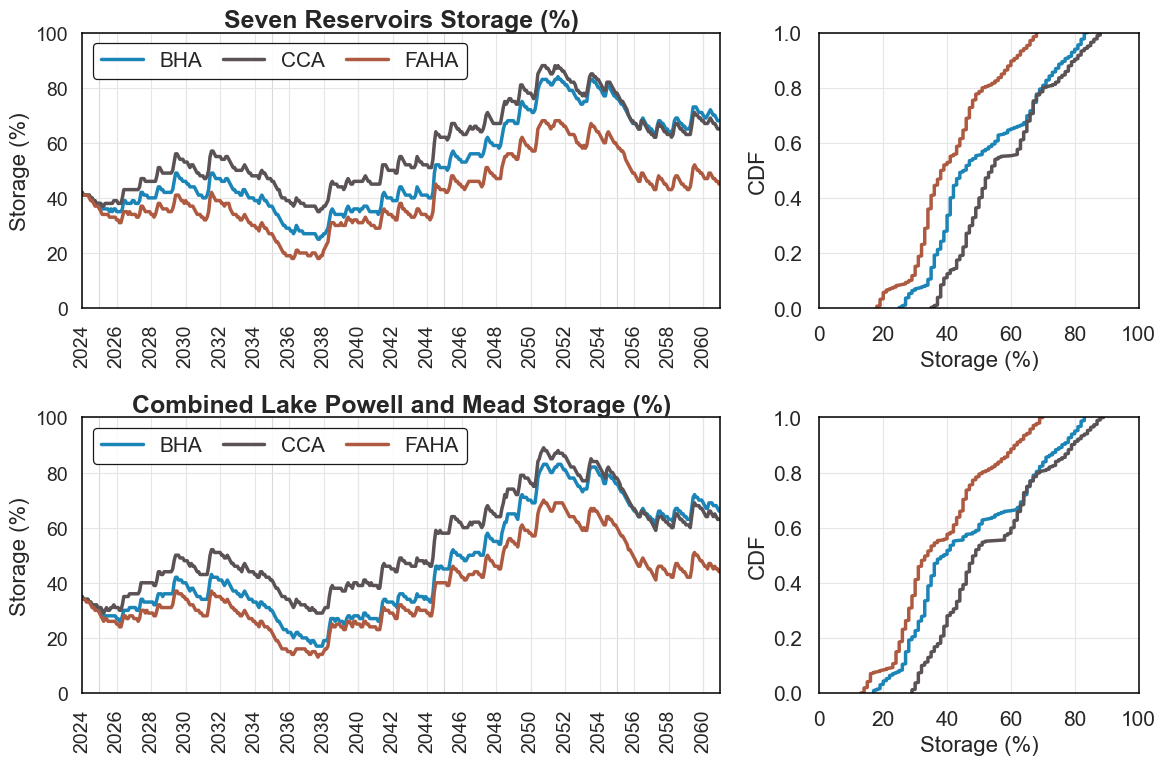

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig5_7Res_Combined_PowellMead_Storage.png


In [2]:
# Combeind Lake Powell + Mead, 7 Res Storage Plots
# === Nature Communications Style Storage Panel (custom titles + CDF per plot) ===
# Fully self-contained: includes helpers, palette, and the datetime mask fix.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter
# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')

GROUPS = {
    "Storage": [
        "NOABM_NSW.Storage7Res_perc_monthly.csv",
        "NOABM_TotVal.PowellMead_Storage_perc_monthly.csv",
    ],
    "Supply": [
        "NOABM_CumulativeNaturalFlow.AboveLeesFerry_monthly.csv",  # common input
        "NOABM_CCA.3yrAvgFlow_annual.csv",                         # CCA only
    ],
    "Demand": [
        "NOABM_LBDelivery.AnnualActualDelivery_annual.csv",
        "NOABM_UBDelivery.AnnualActualDelivery_annual.csv",
        "NOABM_ComputedStateDepletions.ArizonaActual_monthly.csv",
        "NOABM_ComputedStateDepletions.CaliforniaActual_monthly.csv",
        "NOABM_ComputedStateDepletions.ColoradoActual_monthly.csv",
        "NOABM_ComputedStateDepletions.NevadaActual_monthly.csv",
        "NOABM_ComputedStateDepletions.NewMexicoActual_monthly.csv",
        "NOABM_ComputedStateDepletions.UtahActual_monthly.csv",
        "ComputedStateDepletions.WyomingActual_monthly.csv",
    ],
    "Shortage": [
        "NOABM_LBShort.CAPSpecifiedShortage_annual.csv",
        "NOABM_LBShort.SNWPSpecifiedShortage_annual.csv",
        "NOABM_LBShort.IIDSpecifiedShortage_annual.csv",
        "NOABM_LBShort.MWDSpecifiedShortage_annual.csv",
        "NOABM_LBShort.MexicoSpecifiedShortage_annual.csv",
        "NOABM_SystemConditions.LBShortageTier_annual.csv",
    ],
}
# ----------------------- SETTINGS YOU CAN EDIT -----------------------
figsize = (12, 8)        # overall figure size (width, height)
linewidth = 2.5           # line width for all scenario traces
start_year = 2024         # start year on x-axis
year_label_step = 2       # show tick labels every 2 years
five_year_grid = True     # add faint vertical grid every 5 years

# Titles for each time-series plot (left panels), one per file:
plot_titles = [
    "Seven Reservoirs Storage (%)",
    "Combined Lake Powell and Mead Storage (%)"
]

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAHA"]
SCENARIO_LABELS_updated = SCENARIO_LABELS

colors = {
    "BHA": "#1b85b8",      # Blue-teal
    "CCA": "#5a5255",      # Charcoal gray-brown
    "FAA": "#559e83",      # Green-teal
    "FAHA": "#ae5a41",     # Red-brown
    "NAA": "#c3cb71", # Yellow-green
#    "NoActionBHA": "#888888"  # fallback color if needed
}

# ----------------------- HELPER FUNCTIONS ---------------------------
def read_table(path: str) -> pd.DataFrame:
    """Read CSV with unknown delimiter safely."""
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    """
    Return (df_sorted, time_col) where time_col is a datetime-like column named '_time'.
    Tries common patterns and Year/Month combos.
    """
    # Pick a likely time column
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()

    # Try to parse directly
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    # If that failed, try Year/Month combo
    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )

    # If still not parsed, try as 4-digit year
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")

    # If nothing worked, leave as-is (won't get date ticks)
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    """Return {scenario_label: dataframe_column_name} via case-insensitive substring match."""
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        # exact match first
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

def pretty_title(fname: str) -> str:
    return os.path.splitext(os.path.basename(fname))[0].replace(".", " ")

def ylabel_from_name(name: str) -> str:
    n = name.lower()
    if "perc" in n or "percent" in n:
        return "Percent of capacity (%)"
    return "Storage (fraction)"

# ----------------------- STYLE ---------------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------
files = [f for f in GROUPS["Storage"] if os.path.exists(f)]
if not files:
    print("[Storage] No matching CSVs found.")
else:
    n = len(files)
    # Two columns per file: [time series | CDF]
    # width_ratios: the number control the left to right panel width ratio
    fig, axes = plt.subplots(n, 2, figsize=figsize, gridspec_kw={"width_ratios": [3, 1.5]})
    axes = np.atleast_2d(axes)  # shape (n, 2)

    for i, f in enumerate(files):
        df_raw = read_table(f)
        df, tcol = detect_time_col(df_raw)
        df.rename(columns={'NoAction': 'NAA'}, inplace=True)  # rename for consistency
        scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)

        ax_ts  = axes[i, 0]  # time-series axis (left)
        ax_cdf = axes[i, 1]  # CDF axis (right)

        # ---- TIME SERIES (LEFT) ----
        for scen, col in scen_cols.items():
            if col in df.columns:
                sns.lineplot(
                    x=df[tcol],
                    y=df[col]*100,
                    ax=ax_ts,
                    label=scen,
                    linewidth=linewidth,
                    color=colors.get(scen, "#888888")
                )

        # Title for left plot
        if i < len(plot_titles):
            title_text = plot_titles[i]
        else:
            title_text = pretty_title(f).replace("_", " ")
        ax_ts.set_title(title_text, fontsize=18, fontweight="bold", pad=4)

        # Axis styling
        ax_ts.set_ylabel("Storage (%)", fontsize=16)
        ax_ts.set_xlabel("")
        ax_ts.tick_params(axis="both", labelsize=14, pad =1)
        ax_ts.set_ylim(0, 100)

        # Black frame
        for sp in ax_ts.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        # X formatting
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            years = pd.to_datetime(df[tcol], errors="coerce").dt.year
            min_year_data, max_year_data = int(years.min()), int(years.max())
            xmin = pd.Timestamp(f"{max(start_year, min_year_data)}-01-01")
            xmax = pd.Timestamp(f"{max_year_data}-12-31")
            ax_ts.set_xlim(xmin, xmax)

            ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
            ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
            ax_ts.tick_params(axis="x", rotation=90, pad=2)
            ax_ts.margins(x=0.01)

            if five_year_grid:
                yrl = np.arange((xmin.year // 5) * 5, xmax.year + 1, 5)
                for yr in yrl:
                    ax_ts.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

        # Legend (boxed, no title) — only on left
        leg = ax_ts.legend(
            frameon=True, fontsize=15, ncol=3, loc="upper left",
            handlelength=2, columnspacing=1
        )
        leg.set_title(None)
        leg.get_frame().set_edgecolor("black")
        leg.get_frame().set_linewidth(0.9)
        leg.get_frame().set_alpha(0.9)

        # Subtle grid
        ax_ts.grid(axis="y", color="0.9", linewidth=0.8)
        ax_ts.grid(axis="x", color="0.9", linewidth=0.8)

        # ---- CDF (RIGHT) ----
        # Respect visible time window on the left axis (convert mpl numbers -> Timestamps)
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            x0_num, x1_num = ax_ts.get_xlim()
            x0 = pd.Timestamp(mdates.num2date(x0_num)).tz_localize(None)
            x1 = pd.Timestamp(mdates.num2date(x1_num)).tz_localize(None)
            t = pd.to_datetime(df[tcol], errors="coerce")
            mask = (t >= x0) & (t <= x1)
            df_win = df.loc[mask].copy()
        else:
            df_win = df.copy()

        # Plot empirical CDF for each scenario
        for scen, col in scen_cols.items():
            if col not in df_win.columns:
                continue
            vals = pd.to_numeric(df_win[col], errors="coerce").dropna().values
            if vals.size == 0:
                continue
            # storage is fractional; keep within [0, 1] for clean CDF
            vals = np.clip(vals, 0, 1)
            x = np.sort(vals)*100  # convert to percentage
            y = np.linspace(0, 1, len(x), endpoint=True)
            ax_cdf.plot(x, y, linewidth=linewidth, color=colors.get(scen, "#888888"))

        # CDF styling
        ax_cdf.set_xlim(0, 100)
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Storage (%)", fontsize=16)
        ax_cdf.set_ylabel("CDF", fontsize=16)
        ax_cdf.tick_params(axis="both", labelsize=15)

        # Black frame
        for sp in ax_cdf.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        ax_cdf.grid(axis="both", color="0.9", linewidth=0.8)

    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

# Adjust the filename and path as needed
save_path = os.path.join(root, "Figure", "Fig5_7Res_Combined_PowellMead_Storage.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")

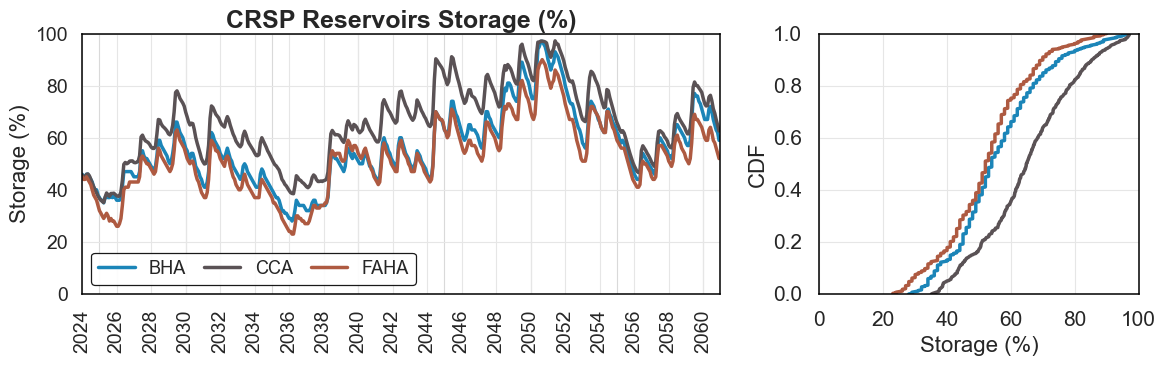

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\FigS3_CRSP_Storage.png


In [3]:
# CRSP Storage (%)
# === Nature Communications Style Storage Panel (custom titles + CDF per plot) ===
# Fully self-contained: includes helpers, palette, and the datetime mask fix.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter

GROUPS = {
    "Storage": [
        "NOABM_NSW.Storage_CRSP_perc_monthly.csv",
    ],
}

# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')

# ----------------------- SETTINGS YOU CAN EDIT -----------------------
figsize = (12, 4)        # overall figure size (width, height)
linewidth = 2.5           # line width for all scenario traces
start_year = 2024         # start year on x-axis
year_label_step = 2       # show tick labels every 2 years
five_year_grid = True     # add faint vertical grid every 5 years

# Titles for each time-series plot (left panels), one per file:
plot_titles = [
    "CRSP Reservoirs Storage (%)",
]

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA",  "FAHA"]
SCENARIO_LABELS_updated = SCENARIO_LABELS

colors = {
    "BHA": "#1b85b8",      # Blue-teal
    "CCA": "#5a5255",      # Charcoal gray-brown
    "FAA": "#559e83",      # Green-teal
    "FAHA": "#ae5a41",     # Red-brown
    "NAA": "#c3cb71", # Yellow-green
#    "NoActionBHA": "#888888"  # fallback color if needed
}

# ----------------------- HELPER FUNCTIONS ---------------------------
def read_table(path: str) -> pd.DataFrame:
    """Read CSV with unknown delimiter safely."""
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    """
    Return (df_sorted, time_col) where time_col is a datetime-like column named '_time'.
    Tries common patterns and Year/Month combos.
    """
    # Pick a likely time column
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()

    # Try to parse directly
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    # If that failed, try Year/Month combo
    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )

    # If still not parsed, try as 4-digit year
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")

    # If nothing worked, leave as-is (won't get date ticks)
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    """Return {scenario_label: dataframe_column_name} via case-insensitive substring match."""
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        # exact match first
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

def pretty_title(fname: str) -> str:
    return os.path.splitext(os.path.basename(fname))[0].replace(".", " ")

def ylabel_from_name(name: str) -> str:
    n = name.lower()
    if "perc" in n or "percent" in n:
        return "Percent of capacity (%)"
    return "Storage (fraction)"

# ----------------------- STYLE ---------------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------
files = [f for f in GROUPS["Storage"] if os.path.exists(f)]
if not files:
    print("[Storage] No matching CSVs found.")
else:
    n = len(files)
    # Two columns per file: [time series | CDF]
    # width_ratios: the number control the left to right panel width ratio
    fig, axes = plt.subplots(n, 2, figsize=figsize, gridspec_kw={"width_ratios": [3, 1.5]})
    axes = np.atleast_2d(axes)  # shape (n, 2)

    for i, f in enumerate(files):
        df_raw = read_table(f)
        df, tcol = detect_time_col(df_raw)
        df.rename(columns={'NoAction': 'NAA'}, inplace=True)  # rename for consistency
        scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)

        ax_ts  = axes[i, 0]  # time-series axis (left)
        ax_cdf = axes[i, 1]  # CDF axis (right)

        # ---- TIME SERIES (LEFT) ----
        for scen, col in scen_cols.items():
            if col in df.columns:
                sns.lineplot(
                    x=df[tcol],
                    y=df[col]*100,
                    ax=ax_ts,
                    label=scen,
                    linewidth=linewidth,
                    color=colors.get(scen, "#888888")
                )

        # Title for left plot
        if i < len(plot_titles):
            title_text = plot_titles[i]
        else:
            title_text = pretty_title(f).replace("_", " ")
        ax_ts.set_title(title_text, fontsize=18, fontweight="bold", pad=4)

        # Axis styling
        ax_ts.set_ylabel("Storage (%)", fontsize=16)
        ax_ts.set_xlabel("")
        ax_ts.tick_params(axis="both", labelsize=14, pad =1)
        ax_ts.set_ylim(0, 100)

        # Black frame
        for sp in ax_ts.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        # X formatting
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            years = pd.to_datetime(df[tcol], errors="coerce").dt.year
            min_year_data, max_year_data = int(years.min()), int(years.max())
            xmin = pd.Timestamp(f"{max(start_year, min_year_data)}-01-01")
            xmax = pd.Timestamp(f"{max_year_data}-12-31")
            ax_ts.set_xlim(xmin, xmax)

            ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
            ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
            ax_ts.tick_params(axis="x", rotation=90, pad=2)
            ax_ts.margins(x=0.01)

            if five_year_grid:
                yrl = np.arange((xmin.year // 5) * 5, xmax.year + 1, 5)
                for yr in yrl:
                    ax_ts.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

        # Legend (boxed, no title) — only on left
        leg = ax_ts.legend(
            frameon=True, fontsize=13, ncol=5, loc="lower left",
            handlelength=2, columnspacing=1
        )
        leg.set_title(None)
        leg.get_frame().set_edgecolor("black")
        leg.get_frame().set_linewidth(0.9)
        leg.get_frame().set_alpha(0.9)

        # Subtle grid
        ax_ts.grid(axis="y", color="0.9", linewidth=0.8)
        ax_ts.grid(axis="x", color="0.9", linewidth=0.8)

        # ---- CDF (RIGHT) ----
        # Respect visible time window on the left axis (convert mpl numbers -> Timestamps)
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            x0_num, x1_num = ax_ts.get_xlim()
            x0 = pd.Timestamp(mdates.num2date(x0_num)).tz_localize(None)
            x1 = pd.Timestamp(mdates.num2date(x1_num)).tz_localize(None)
            t = pd.to_datetime(df[tcol], errors="coerce")
            mask = (t >= x0) & (t <= x1)
            df_win = df.loc[mask].copy()
        else:
            df_win = df.copy()

        # Plot empirical CDF for each scenario
        for scen, col in scen_cols.items():
            if col not in df_win.columns:
                continue
            vals = pd.to_numeric(df_win[col], errors="coerce").dropna().values
            if vals.size == 0:
                continue
            # storage is fractional; keep within [0, 1] for clean CDF
            vals = np.clip(vals, 0, 1)
            x = np.sort(vals)*100  # convert to percentage
            y = np.linspace(0, 1, len(x), endpoint=True)
            ax_cdf.plot(x, y, linewidth=linewidth, color=colors.get(scen, "#888888"))

        # CDF styling
        ax_cdf.set_xlim(0, 100)
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Storage (%)", fontsize=16)
        ax_cdf.set_ylabel("CDF", fontsize=16)
        ax_cdf.tick_params(axis="both", labelsize=15)

        # Black frame
        for sp in ax_cdf.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        ax_cdf.grid(axis="both", color="0.9", linewidth=0.8)

    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

# Adjust the filename and path as needed
save_path = os.path.join(root, "Figure", "FigS3_CRSP_Storage.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")

C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM


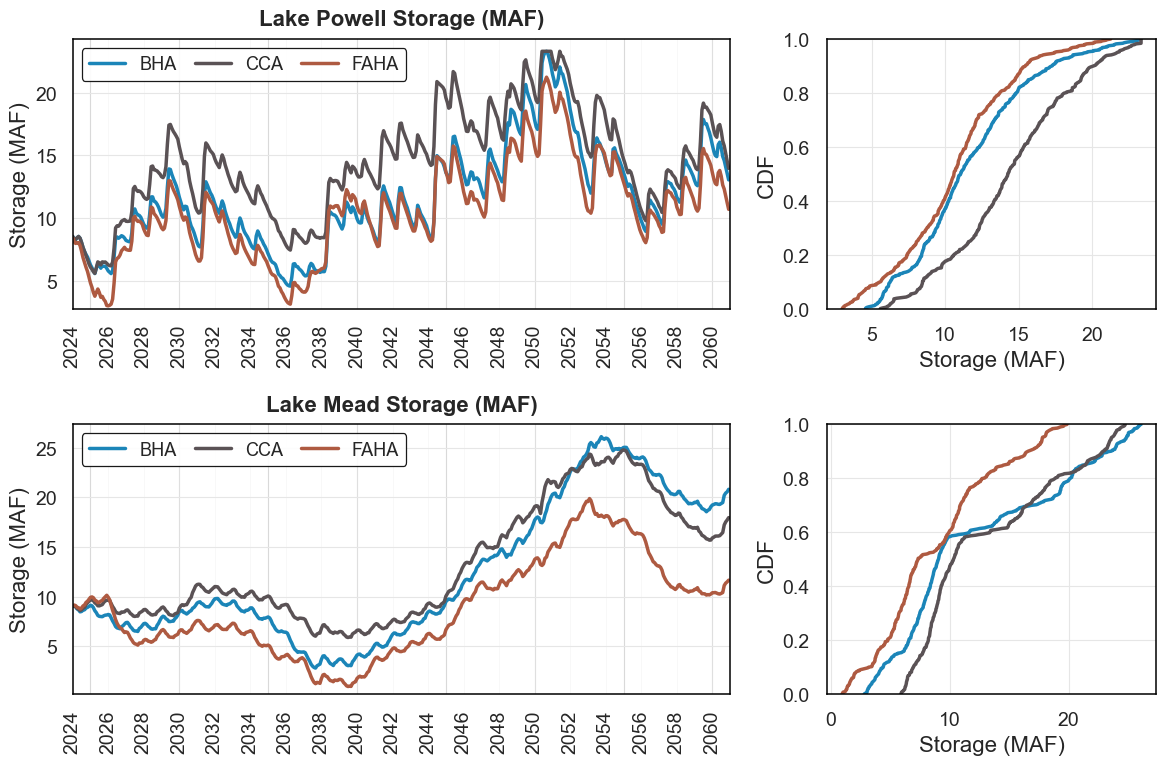

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\FiS2_Lake Powell and Lake Mead Storage.png


In [4]:
# === Nature Communications Style: Lake Mead and Powell Storage ===

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter


# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
print(cwd)
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')


# ----------------------- SETTINGS -----------------------
figsize = (12, 8)        # overall figure size (width, height)
linewidth = 2.5
start_year = 1990         # change if needed
year_label_step = 2
five_year_grid = True

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAHA"]
SCENARIO_LABELS_updated = SCENARIO_LABELS


# Files to render (edit names if needed)
FILES = [
    ("Lake Powell Storage (MAF)", "NOABM_Powell.Storage_monthly.csv"),
    ("Lake Mead Storage (MAF)", "NOABM_Mead.Storage_monthly.csv"),
]


# Color palette
colors = {
    "BHA": "#1b85b8",
    "CCA": "#5a5255",
    "FAA": "#559e83",
    "FAHA": "#ae5a41",
    "NAA": "#c3cb71",
#    "NoActionBHA": "#888888"
}

# ----------------------- HELPERS -----------------------
def read_table(path: str) -> pd.DataFrame:
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

# ----------------------- STYLE -----------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------
files = [(title, f) for title, f in FILES if os.path.exists(os.path.join(cwd, f))]
if not files:
    print("[Storage] No matching CSVs found.")
else:
    n = len(files)
    fig, axes = plt.subplots(n, 2, figsize=figsize, gridspec_kw={"width_ratios": [3, 1.5]})
    axes = np.atleast_2d(axes)

    for i, (title_text, f) in enumerate(files):
        df_raw = read_table(os.path.join(cwd, f))
        df, tcol = detect_time_col(df_raw)
        scen_cols = find_scenario_columns(df, SCENARIO_LABELS)

        ax_ts  = axes[i, 0]
        ax_cdf = axes[i, 1]

        # ---- TIME SERIES (LEFT) ----
        for scen, col in scen_cols.items():
            if col in df.columns:
                sns.lineplot(
                    x=df[tcol],
                    y=df[col]/1e6, # convert to MAF
                    ax=ax_ts,
                    label=scen,
                    linewidth=linewidth,
                    color=colors.get(scen, "#888888"),
                )

        ax_ts.set_title(title_text, fontsize=16, fontweight="bold", pad=10)
        ax_ts.set_ylabel("Storage (MAF)", fontsize=16)
        ax_ts.set_xlabel("", fontsize=16)
        ax_ts.tick_params(axis="both", labelsize=14, pad =2)

        # Auto y-limits with padding
        vals = []
        for _, col in scen_cols.items():
            v = pd.to_numeric(df[col], errors="coerce")
            if v.notna().any():
                vals.append(v.values)
        if vals:
            v = np.concatenate(vals)
            v = v[np.isfinite(v)]/1e6  # MAF
            if v.size:
                vmin, vmax = np.nanpercentile(v, [1, 100])
                pad = 0.05 * (vmax - vmin if vmax > vmin else max(abs(vmax), 1.0))
                ax_ts.set_ylim(vmin - pad, vmax + pad) # +50 ft padding for Legend space

        # Black frame
        for sp in ax_ts.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        # X formatting
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            years = pd.to_datetime(df[tcol], errors="coerce").dt.year
            min_year_data, max_year_data = int(years.min()), int(years.max())
            xmin = pd.Timestamp(f"{max(start_year, min_year_data)}-01-01")
            xmax = pd.Timestamp(f"{max_year_data}-12-31")
            ax_ts.set_xlim(xmin, xmax)

            ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
            ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
            ax_ts.tick_params(axis="x", rotation=90, pad=2)
            ax_ts.margins(x=0.01)

            if five_year_grid:
                yrl = np.arange((xmin.year // 5) * 5, xmax.year + 1, 5)
                for yr in yrl:
                    ax_ts.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

        leg = ax_ts.legend(
            frameon=True, fontsize=13, ncol=3, loc="upper left",
            handlelength=2., columnspacing=1.
        )
        leg.set_title(None)
        leg.get_frame().set_edgecolor("black")
        leg.get_frame().set_linewidth(0.9)
        leg.get_frame().set_alpha(0.9)

        ax_ts.grid(axis="y", color="0.9", linewidth=0.8)
        ax_ts.grid(axis="x", color="0.92", linewidth=0.5, alpha=0.5)

        # ---- CDF (RIGHT) ----
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            x0_num, x1_num = ax_ts.get_xlim()
            x0 = pd.Timestamp(mdates.num2date(x0_num)).tz_localize(None)
            x1 = pd.Timestamp(mdates.num2date(x1_num)).tz_localize(None)
            t = pd.to_datetime(df[tcol], errors="coerce")
            mask = (t >= x0) & (t <= x1)
            df_win = df.loc[mask].copy()
        else:
            df_win = df.copy()

        nonpct_min, nonpct_max = np.inf, -np.inf
        for scen, col in scen_cols.items():
            if col not in df_win.columns:
                continue
            vals = pd.to_numeric(df_win[col], errors="coerce").dropna().values/1e6  # MAF
            if vals.size == 0:
                continue
            nonpct_min = min(nonpct_min, np.nanmin(vals))
            nonpct_max = max(nonpct_max, np.nanmax(vals))

            x = np.sort(vals)
            y = np.linspace(0, 1, len(x), endpoint=True)
            ax_cdf.plot(x, y, linewidth=linewidth, color=colors.get(scen, "#888888"))

        # CDF styling (auto-range)
        if np.isfinite(nonpct_min) and np.isfinite(nonpct_max) and nonpct_min < nonpct_max:
            span = nonpct_max - nonpct_min
            pad = 0.05 * span
            ax_cdf.set_xlim(nonpct_min - pad, nonpct_max + pad)
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Storage (MAF)", fontsize=16)
        ax_cdf.set_ylabel("CDF", fontsize=16)
        ax_cdf.tick_params(axis="both", labelsize=14)

        for sp in ax_cdf.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)
        ax_cdf.grid(axis="both", color="0.9", linewidth=0.8)

    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

# Adjust the filename and path as needed
save_path = os.path.join(root, "Figure", "FiS2_Lake Powell and Lake Mead Storage.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")

CDF plotted for: Lake Powell Elevation (ft)
CDF plotted for: Lake Mead Elevation (ft)


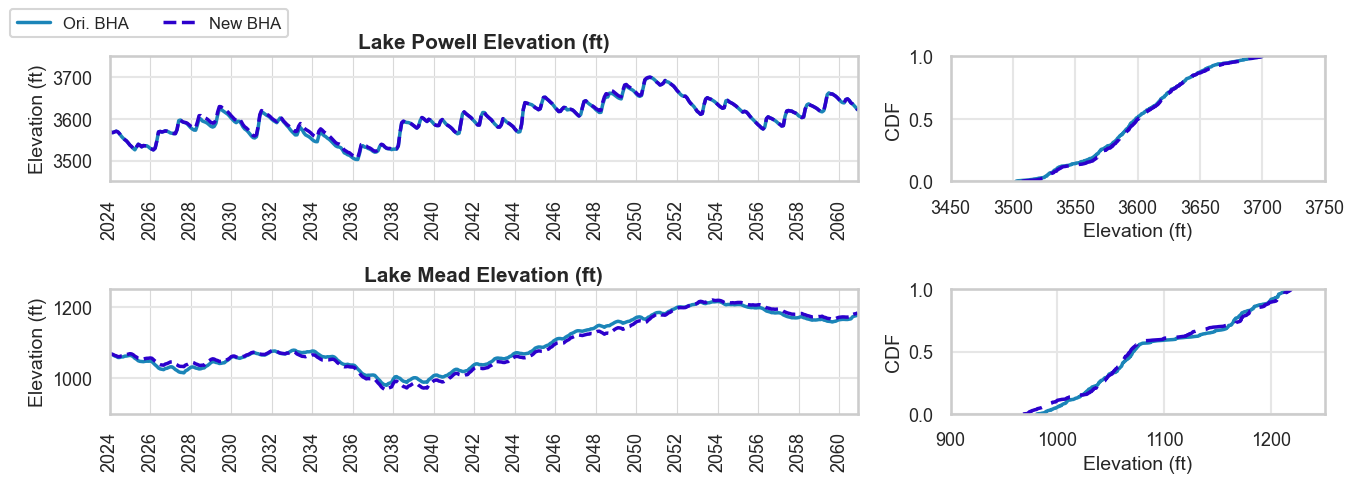

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig10_Powell_Mead_Elevation_BHA_Comparison.png
CDF plotted for: Lake Powell Elevation (ft)
CDF plotted for: Lake Mead Elevation (ft)


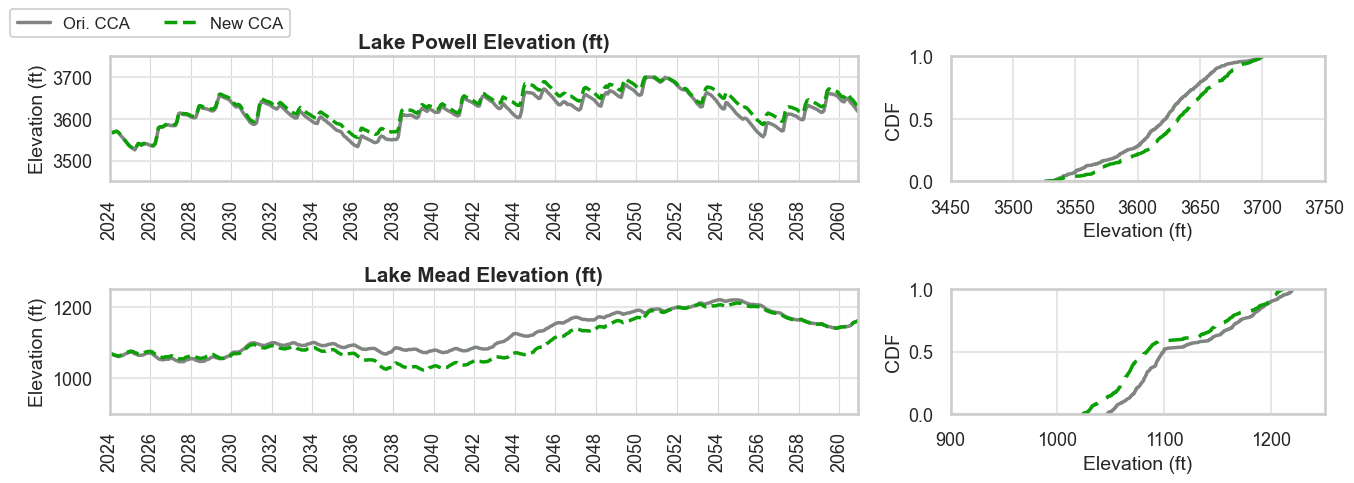

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig10_Powell_Mead_Elevation_CCA_Comparison.png
CDF plotted for: Lake Powell Elevation (ft)
CDF plotted for: Lake Mead Elevation (ft)


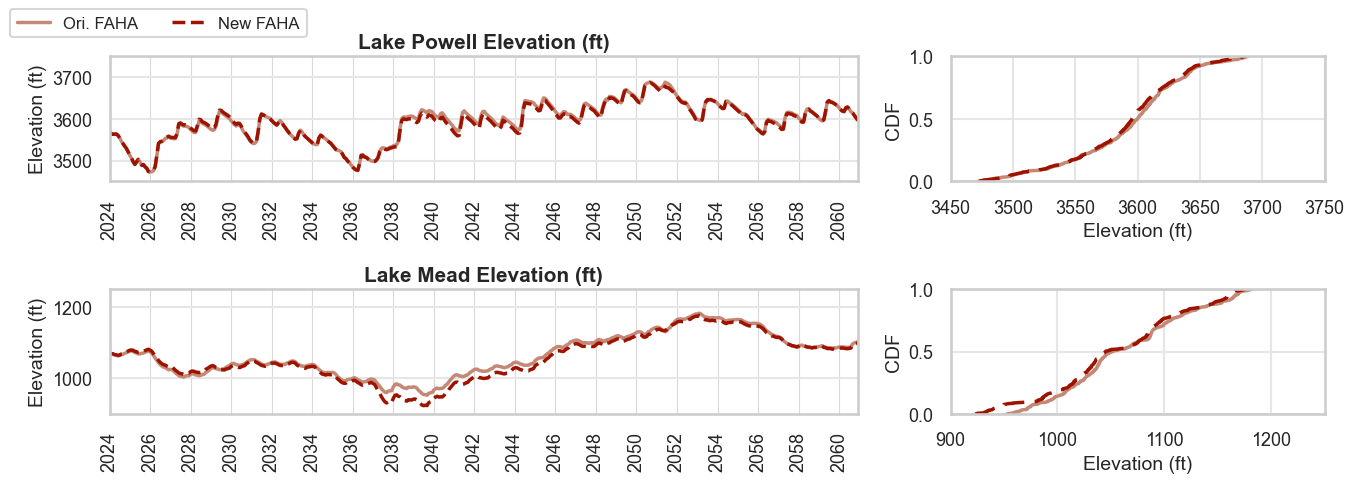

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig10_Powell_Mead_Elevation_FAHA_Comparison.png


In [5]:

# === Nature Communications Style: Lake Mead and Powell Elevation ===
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter

# ========== CHANGE THESE PATHS TO MATCH YOUR MACHINE ==========
new_dir  = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM'
ori_dir = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_NF2000\All_Timeseries_CSVs\NOABM'
# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAHA"]
SCENARIO_LABELS_updated = SCENARIO_LABELS

# ----------------------- SETTINGS -----------------------
figsize = (13.5, 5.2)        # overall figure size (width, height)
linewidth = 2.5
start_year = 2024         # change if needed
year_label_step = 2
five_year_grid = True

# Scenario list we expect in columns (case-insensitive substring match)
out_dir = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1', "Figure")
os.makedirs(out_dir, exist_ok=True)

# Files to render (edit names if needed)
FILES = [
    ("Lake Powell Elevation (ft)", "NOABM_Powell.Elev_monthly.csv"),
    ("Lake Mead Elevation (ft)", "NOABM_Mead.Elev_monthly.csv"),
]


# Color palette
colors = {"BHA_ori": "#1b85b8", "CCA_ori": "#818581","FAHA_ori": "#c48876","BHA_new": "#2c00cc", "CCA_new": "#0CA007","FAHA_new": "#9e1200"}
LINESTYLES = {
    "_ori": "-",     # Original = solid
    "_new": "--"     # Conservation = dashed
}
# ----------------------- HELPERS -----------------------
def read_table(path: str) -> pd.DataFrame:
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

# ----------------------- STYLE -----------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------

SCENARIOS = ["BHA", "CCA", "FAHA"]
EXPS = ["_ori", "_new"]

for scn in SCENARIOS:

    fig, axes = plt.subplots(
        nrows=len(FILES),
        ncols=2,
        figsize= figsize,
        gridspec_kw={"width_ratios": [3, 1.5]},
        sharex=False   # 🔑 important
    )

    axes = np.atleast_2d(axes)

    # ---------- GLOBAL X LIMITS (TIME SERIES) ----------
    global_xmin = pd.Timestamp(f"{start_year}-01-01")
    global_xmax = None

    # ---------- GLOBAL CDF RANGE ----------
    cdf_vals_all = []

    # ---------- READ + PRE-COMPUTE ----------
    data_cache = []

    for title_text, f in FILES:
        df_ori = read_table(os.path.join(ori_dir, f))
        df_ori = df_ori[['Unnamed: 0'] + SCENARIO_LABELS]
        df_ori, tcol = detect_time_col(df_ori)

        df_new = read_table(os.path.join(new_dir, f))
        df_new, _ = detect_time_col(df_new)

        df_ori = df_ori.set_index(tcol)
        df_new = df_new.set_index(tcol)

        df = df_ori.merge(
            df_new,
            left_index=True,
            right_index=True,
            how="outer",
            suffixes=("_ori", "_new")
        )

        data_cache.append((title_text, df))

        xmax = df.index.max()
        if global_xmax is None or xmax > global_xmax:
            global_xmax = xmax

        for exp in EXPS:
            col = f"{scn}{exp}"
            if col in df:
                cdf_vals_all.append(
                    pd.to_numeric(df[col], errors="coerce").dropna().values
                )

    # ---------- PLOTTING ----------
    for i, (title_text, df) in enumerate(data_cache):

        cols = [f"{scn}_ori", f"{scn}_new"]

        ax_ts  = axes[i, 0]
        ax_cdf = axes[i, 1]

        # ===== TIME SERIES =====
        for col in cols:
            sns.lineplot(
                x=df.index,
                y=df[col],
                ax=ax_ts,
                label=col,
                linewidth = linewidth,
                color=colors.get(col, "#888888"),
                linestyle=LINESTYLES["_ori" if col.endswith("_ori") else "_new"],
                dashes=(6, 3) if col.endswith("_new") else None

            )

        ax_ts.set_title(title_text, fontsize=15, fontweight="bold")
        ax_ts.set_ylabel("Elevation (ft)", fontsize=14)

        # Consistent x-axis
        ax_ts.set_xlim(global_xmin, global_xmax)
        if "Powell" in title_text: 
           elev_min = 3450
           elev_max = 3750
        elif "Mead" in title_text:
           elev_min = 900
           elev_max = 1250

        ax_ts.set_ylim(elev_min, elev_max)
        ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
        ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
        ax_ts.tick_params(axis="x", rotation=90, labelsize=13)
        ax_ts.tick_params(axis="y", labelsize=13)
        # Force x-labels on BOTH rows
        ax_ts.set_xlabel("", fontsize=14)

        ax_ts.grid(axis="x", which="major", color="0.85", linewidth=0.8)
        ax_ts.grid(axis="y", color="0.9")
        ax_ts.legend_.remove() if ax_ts.legend_ else None

# ===================== CDF =====================

# --- collect values for this reservoir only ---
        cdf_vals = []

        for col in cols:
            if col in df.columns:
                v = pd.to_numeric(df[col], errors="coerce").dropna().values
                if v.size > 0:
                    cdf_vals.append(v)

        # If no data, just leave the panel empty (DO NOT continue)
        if len(cdf_vals) > 0:

            cdf_vals = np.concatenate(cdf_vals)
            # cdf_min = np.nanmin(cdf_vals)
            # cdf_max = np.nanmax(cdf_vals)
            # cdf_pad = 0.03 * (cdf_max - cdf_min)

            # --- plot CDF curves ---
            for col in cols:
                if col not in df.columns:
                    continue

                vals = pd.to_numeric(df[col], errors="coerce").dropna().values
                if vals.size == 0:
                    continue

                x = np.sort(vals)
                y = np.linspace(0, 1, len(x))

                if col.endswith("_ori"):
                    ax_cdf.plot(
                        x, y,
                        linewidth=linewidth,
                        color=colors.get(col, "#888888"),
                        linestyle="-"
                    )
                else:
                    ax_cdf.plot(
                        x, y,
                        linewidth=linewidth,
                        color=colors.get(col, "#888888"),
                        linestyle="--",
                        dashes=(6, 3)
                    )

            ax_cdf.set_xlim(elev_min, elev_max)

        # --- axis formatting always runs ---
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Elevation (ft)", fontsize=14)
        ax_cdf.set_ylabel("CDF", fontsize=14)
        ax_cdf.tick_params(axis="both", labelsize=13)
        ax_cdf.grid(color="0.9")
        print("CDF plotted for:", title_text)
# ----- SHARED LEGEND (outside plot area) -----
    handles, labels = axes[0, 0].get_legend_handles_labels()

    label_map = {
        "_ori": "Ori. " + scn,
        "_new": "New " + scn
    }

    new_handles, new_labels = [], []
    for h, lab in zip(handles, labels):
        for key, name in label_map.items():
            if lab.endswith(key):
                new_handles.append(h)
                new_labels.append(name)
                break

    fig.legend(
        new_handles,
        new_labels,
        loc="upper left",
        bbox_to_anchor=(0., 0.96),
        ncol=2,
        frameon=True,
        fontsize=12
    )

    fig.tight_layout(rect=[0, 0, 1, 0.95])

    save_path = os.path.join(
        out_dir,
        f"Fig10_Powell_Mead_Elevation_{scn}_Comparison.png"
    )

    fig.savefig(save_path, dpi=300)
    plt.show()
    plt.close(fig)
    print(f"✅ Figure saved to: {save_path}")


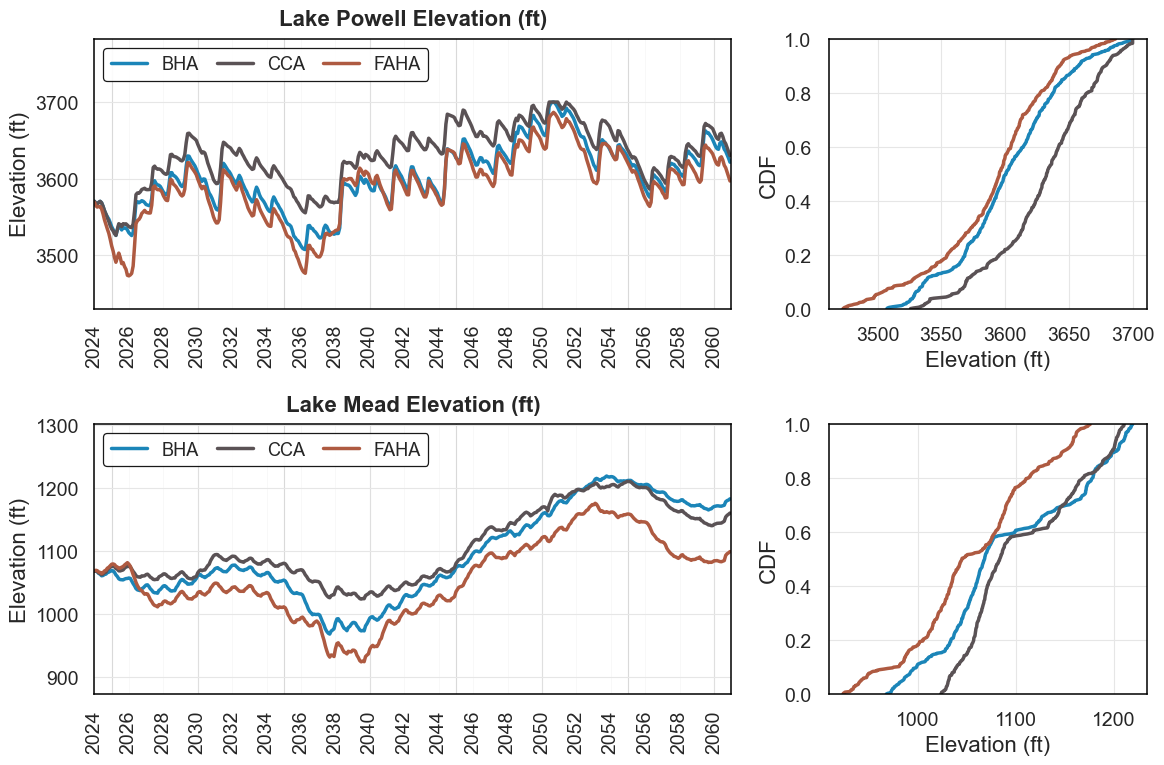

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig4_Lake Powell and Lake Mead Elevation.png


In [6]:
# === Nature Communications Style: Lake Mead and Powell Elevation ===

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter


# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')


# ----------------------- SETTINGS -----------------------
figsize = (12, 8)        # overall figure size (width, height)
linewidth = 2.5
start_year = 1990         # change if needed
year_label_step = 2
five_year_grid = True

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAHA"]
SCENARIO_LABELS_updated = SCENARIO_LABELS


# Files to render (edit names if needed)
FILES = [
    ("Lake Powell Elevation (ft)", "NOABM_Powell.Elev_monthly.csv"),
    ("Lake Mead Elevation (ft)", "NOABM_Mead.Elev_monthly.csv"),
]


# Color palette
colors = {
    "BHA": "#1b85b8",
    "CCA": "#5a5255",
    "FAHA": "#ae5a41",
#    "NoActionBHA": "#888888"
}

# ----------------------- HELPERS -----------------------
def read_table(path: str) -> pd.DataFrame:
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

# ----------------------- STYLE -----------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------
files = [(title, f) for title, f in FILES if os.path.exists(os.path.join(cwd, f))]
if not files:
    print("[Elevation] No matching CSVs found.")
else:
    n = len(files)
    fig, axes = plt.subplots(n, 2, figsize=figsize, gridspec_kw={"width_ratios": [3, 1.5]})
    axes = np.atleast_2d(axes)

    for i, (title_text, f) in enumerate(files):
        df_raw = read_table(os.path.join(cwd, f))
        df, tcol = detect_time_col(df_raw)
        df.rename(columns={'NoAction': 'NAA'}, inplace=True)  # rename for consistency
        scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)

        ax_ts  = axes[i, 0]
        ax_cdf = axes[i, 1]

        # ---- TIME SERIES (LEFT) ----
        for scen, col in scen_cols.items():
            if col in df.columns:
                sns.lineplot(
                    x=df[tcol],
                    y=df[col],
                    ax=ax_ts,
                    label=scen,
                    linewidth=linewidth,
                    color=colors.get(scen, "#888888"),
                )

        ax_ts.set_title(title_text, fontsize=16, fontweight="bold", pad=10)
        ax_ts.set_ylabel("Elevation (ft)", fontsize=16)
        ax_ts.set_xlabel("", fontsize=16)
        ax_ts.tick_params(axis="both", labelsize=14, pad =2)

        # Auto y-limits with padding
        vals = []
        for _, col in scen_cols.items():
            v = pd.to_numeric(df[col], errors="coerce")
            if v.notna().any():
                vals.append(v.values)
        if vals:
            v = np.concatenate(vals)
            v = v[np.isfinite(v)]
            if v.size:
                vmin, vmax = np.nanpercentile(v, [1, 99])
                pad = 0.05 * (vmax - vmin if vmax > vmin else max(abs(vmax), 1.0))
                ax_ts.set_ylim(vmin - pad -50, vmax + pad+75) # +50 ft padding for Legend space

        # Black frame
        for sp in ax_ts.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        # X formatting
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            years = pd.to_datetime(df[tcol], errors="coerce").dt.year
            min_year_data, max_year_data = int(years.min()), int(years.max())
            xmin = pd.Timestamp(f"{max(start_year, min_year_data)}-01-01")
            xmax = pd.Timestamp(f"{max_year_data}-12-31")
            ax_ts.set_xlim(xmin, xmax)

            ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
            ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
            ax_ts.tick_params(axis="x", rotation=90, pad=2)
            ax_ts.margins(x=0.01)

            if five_year_grid:
                yrl = np.arange((xmin.year // 5) * 5, xmax.year + 1, 5)
                for yr in yrl:
                    ax_ts.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

        leg = ax_ts.legend(
            frameon=True, fontsize=13, ncol=3, loc="upper left",
            handlelength=2., columnspacing=1.
        )
        leg.set_title(None)
        leg.get_frame().set_edgecolor("black")
        leg.get_frame().set_linewidth(0.9)
        leg.get_frame().set_alpha(0.9)

        ax_ts.grid(axis="y", color="0.9", linewidth=0.8)
        ax_ts.grid(axis="x", color="0.92", linewidth=0.5, alpha=0.5)

        # ---- CDF (RIGHT) ----
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            x0_num, x1_num = ax_ts.get_xlim()
            x0 = pd.Timestamp(mdates.num2date(x0_num)).tz_localize(None)
            x1 = pd.Timestamp(mdates.num2date(x1_num)).tz_localize(None)
            t = pd.to_datetime(df[tcol], errors="coerce")
            mask = (t >= x0) & (t <= x1)
            df_win = df.loc[mask].copy()
        else:
            df_win = df.copy()

        nonpct_min, nonpct_max = np.inf, -np.inf
        for scen, col in scen_cols.items():
            if col not in df_win.columns:
                continue
            vals = pd.to_numeric(df_win[col], errors="coerce").dropna().values
            if vals.size == 0:
                continue
            nonpct_min = min(nonpct_min, np.nanmin(vals))
            nonpct_max = max(nonpct_max, np.nanmax(vals))

            x = np.sort(vals)
            y = np.linspace(0, 1, len(x), endpoint=True)
            ax_cdf.plot(x, y, linewidth=linewidth, color=colors.get(scen, "#888888"))

        # CDF styling (auto-range)
        if np.isfinite(nonpct_min) and np.isfinite(nonpct_max) and nonpct_min < nonpct_max:
            span = nonpct_max - nonpct_min
            pad = 0.05 * span
            ax_cdf.set_xlim(nonpct_min - pad, nonpct_max + pad)
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Elevation (ft)", fontsize=16)
        ax_cdf.set_ylabel("CDF", fontsize=16)
        ax_cdf.tick_params(axis="both", labelsize=14)

        for sp in ax_cdf.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)
        ax_cdf.grid(axis="both", color="0.9", linewidth=0.8)

    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

# Adjust the filename and path as needed
save_path = os.path.join(root, "Figure", "Fig4_Lake Powell and Lake Mead Elevation.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig8_Basin_Conservation_Water.png


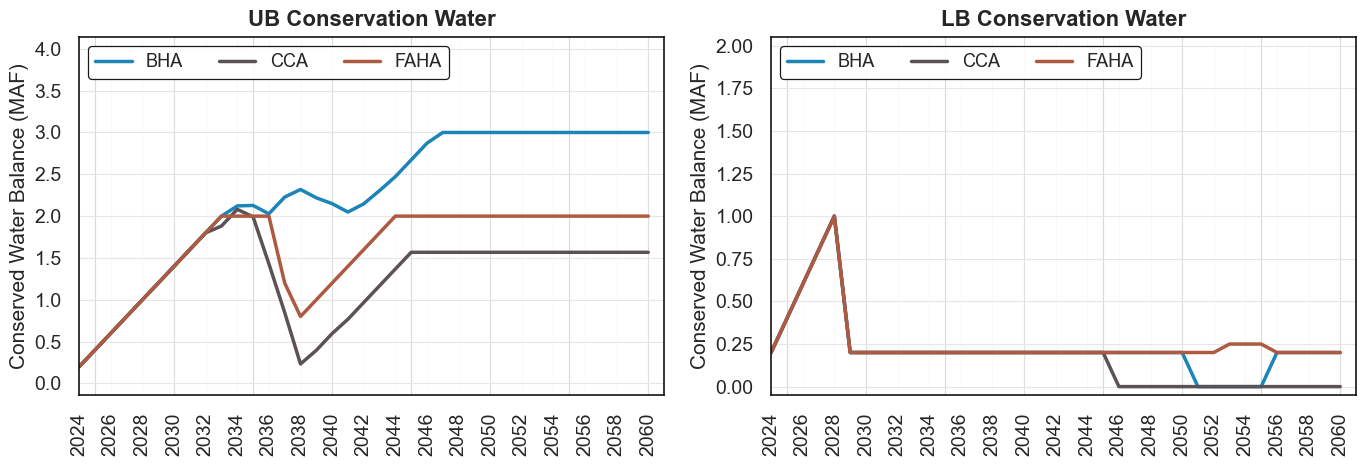

In [7]:
########## Conservation Water ###################
# === Nature Communications Style Delivery Panel (LB + UB) ===
# Self-contained and parallel to your storage styling.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter



# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')

# ----------------------- SETTINGS -----------------------
figsize = (12, 8)        # overall figure size (width, height)
linewidth = 2.5
start_year = 1990         # change if needed
year_label_step = 2
five_year_grid = True

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAHA"]

# Files to render (edit names if needed)
FILES = [
    ("UB Conservation Water", "NOABM_NSW.Powell_NSW_annual.csv"),
    ("LB Conservation Water", "NOABM_NSW.Mead_NSW_annual.csv"),
]

# Color palette
colors = {"BHA": "#1b85b8","CCA": "#5a5255","FAA": "#559e83","FAHA": "#ae5a41","NAA": "#c3cb71",}

# ----------------------- HELPERS -----------------------
def read_table(path: str) -> pd.DataFrame:
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

def style_axes(ax):
    for sp in ax.spines.values():
        sp.set_visible(True)
        sp.set_color("black")
        sp.set_linewidth(1.1)

# ----------------------- BUILD FIGURE -----------------------
files = [(t, f) for t, f in FILES if os.path.exists(os.path.join(cwd, f))]

fig, axes = plt.subplots(
    1, len(files),
    figsize=(14, 5),        # wider, shorter for 2-column layout
    sharey=False
)

if len(files) == 1:
    axes = [axes]

for ax, (title, fname) in zip(axes, files):
    df_raw = read_table(os.path.join(cwd, fname))
    df, tcol = detect_time_col(df_raw)
    df.rename(columns={"NoAction": "NAA"}, inplace=True)
    scen_cols = find_scenario_columns(df, SCENARIO_LABELS)

    t = df[tcol]
    years = t.dt.year
    xmin = pd.Timestamp(f"{max(start_year, years.min())}-01-01")
    xmax = pd.Timestamp(f"{years.max()}-12-31")
    ax.set_xlim(xmin, xmax)

    all_vals = []

    for scen, col in scen_cols.items():
        v = pd.to_numeric(df[col], errors="coerce") / 1e6
        ax.plot(t, v, lw=linewidth, color=colors.get(scen, "#888888"), label=scen)
        all_vals.append(v.values)

    # robust y-limits
    v = np.concatenate(all_vals)
    v = v[np.isfinite(v)]
    if v.size:
        vmin, vmax = np.nanpercentile(v, [1, 99])
        pad = 0.05 * (vmax - vmin)
        ax.set_ylim(0 - pad, vmax + pad + 1.0)

    ax.set_title(title, fontsize=16, fontweight="bold", pad=8)
    ax.set_ylabel("Conserved Water Balance (MAF)", fontsize=15)
    ax.tick_params(axis="both", labelsize=14)

    ax.xaxis.set_major_locator(YearLocator(base=year_label_step))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.tick_params(axis="x", rotation=90)

    if five_year_grid:
        for yr in range((xmin.year // 5) * 5, xmax.year + 1, 5):
            ax.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

    leg = ax.legend(frameon=True, fontsize=13, ncol=3, loc="upper left")
    leg.get_frame().set_edgecolor("black")
    leg.get_frame().set_linewidth(0.9)
    leg.get_frame().set_alpha(0.9)

    ax.grid(axis="y", color="0.9", linewidth=0.8)
    ax.grid(axis="x", color="0.92", linewidth=0.5, alpha=0.5)
    style_axes(ax)

# ----------------------- SAVE -----------------------
fig.tight_layout()

save_path = os.path.join(root, "Figure", "Fig8_Basin_Conservation_Water.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
fig.savefig(save_path, dpi=600, bbox_inches="tight", facecolor="white")
print(f"✅ Figure saved to: {save_path}")



✅ CDF data saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Lower Basin Water Delivery_CDF_ByScenario.csv
✅ CDF data saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Upper Basin Water Delivery_CDF_ByScenario.csv


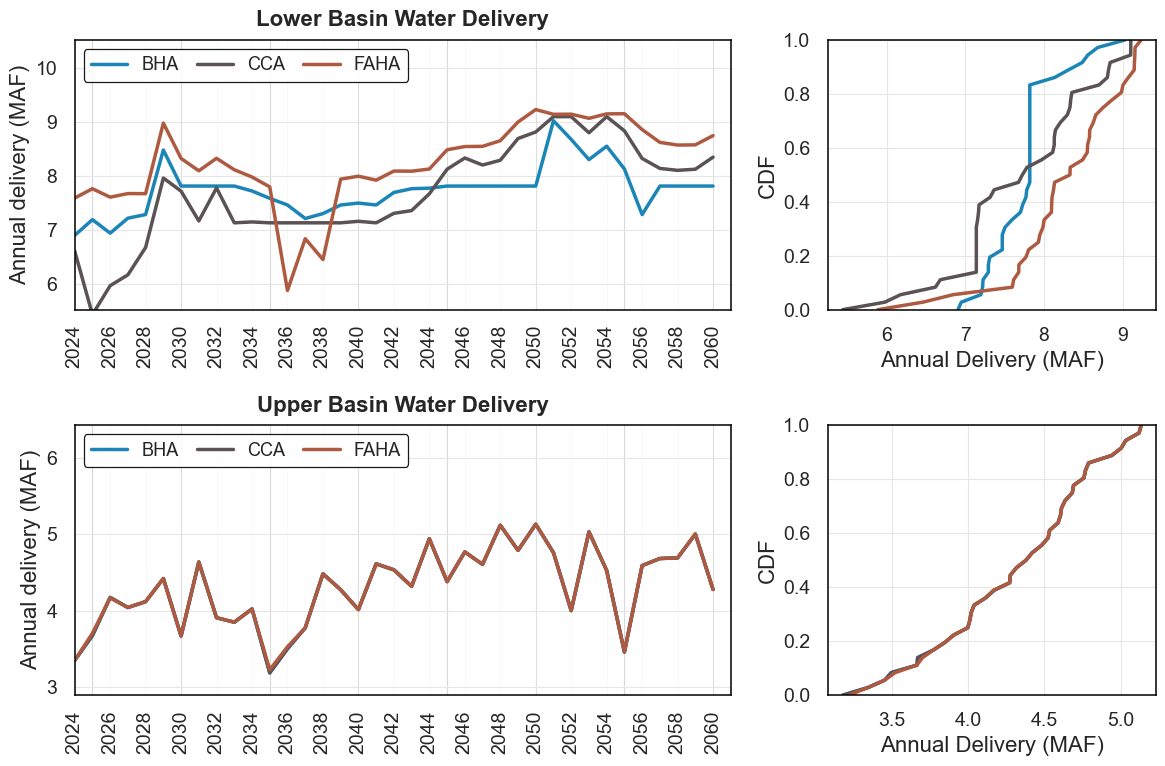

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\FigX_Basin_Annual_Delivery.png


In [10]:
# === Nature Communications Style Delivery Panel (LB + UB) ===
# Self-contained and parallel to your storage styling.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter


# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')

# ----------------------- SETTINGS -----------------------
figsize = (12, 8)        # overall figure size (width, height)
linewidth = 2.5
start_year = 1990         # change if needed
year_label_step = 2
five_year_grid = True

# Scenario list we expect in columns (case-insensitive substring match)
SCENARIO_LABELS = ["BHA", "CCA", "FAA", "FAHA", "NoAction"]
SCENARIO_LABELS_updated = ["BHA", "CCA", "FAA", "FAHA", "NAA"]


# Files to render (edit names if needed)
FILES = [
    ("Lower Basin Water Delivery", "NOABM_LBDelivery.AnnualActualDelivery_annual.csv"),
    ("Upper Basin Water Delivery", "NOABM_UBDelivery.AnnualActualDelivery_annual.csv"),
]


# Color palette
colors = {"BHA": "#1b85b8","CCA": "#5a5255","FAA": "#559e83","FAHA": "#ae5a41","NAA": "#c3cb71",
}

# ----------------------- HELPERS -----------------------
def read_table(path: str) -> pd.DataFrame:
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df: pd.DataFrame):
    tcol = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[tcol], errors="coerce")

    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(
            dft["Year"].astype(int).astype(str) + "-" + dft["Month"].astype(int).astype(str) + "-01",
            errors="coerce"
        )
    if dft["_time"].isna().all() and np.issubdtype(dft[tcol].dtype, np.number):
        dft["_time"] = pd.to_datetime(dft[tcol].astype(int), format="%Y", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = dft[tcol]

    dft = dft.sort_values("_time")
    return dft, "_time"

def find_scenario_columns(df: pd.DataFrame, labels):
    found = {}
    for lab in labels:
        lab_l = lab.lower()
        for c in df.columns:
            if c.lower() == lab_l:
                found[lab] = c
                break
        if lab not in found:
            for c in df.columns:
                if lab_l in c.lower():
                    found.setdefault(lab, c)
    return found

# ----------------------- STYLE -----------------------
sns.set_theme(style="whitegrid", context="talk")
sns.set_palette(list(colors.values()))

# ----------------------- BUILD PLOTS ----------------------
files = [(title, f) for title, f in FILES if os.path.exists(os.path.join(cwd, f))]
if not files:
    print("[Delivery] No matching CSVs found.")
else:
    n = len(files)
    fig, axes = plt.subplots(n, 2, figsize=figsize, gridspec_kw={"width_ratios": [3, 1.5]})
    axes = np.atleast_2d(axes)

    for i, (title_text, f) in enumerate(files):
        df_raw = read_table(os.path.join(cwd, f))
        df, tcol = detect_time_col(df_raw)
        df.rename(columns={'NoAction': 'NAA'}, inplace=True)  # rename for consistency
        scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)

        ax_ts  = axes[i, 0]
        ax_cdf = axes[i, 1]

        # ---- TIME SERIES (LEFT) ----
        for scen, col in scen_cols.items():
            if col in df.columns:
                sns.lineplot(
                    x=df[tcol],
                    y=df[col]/1e6,
                    ax=ax_ts,
                    label=scen,
                    linewidth=linewidth,
                    color=colors.get(scen, "#888888"),
                )

        ax_ts.set_title(title_text, fontsize=16, fontweight="bold", pad=10)
        ax_ts.set_ylabel("Annual delivery (MAF)", fontsize=16)
        ax_ts.set_xlabel("", fontsize=16)
        ax_ts.tick_params(axis="both", labelsize=14)

        # Auto y-limits with padding
        vals = []
        for _, col in scen_cols.items():
            v = pd.to_numeric(df[col], errors="coerce")/1e6 # MAF
            if v.notna().any():
                vals.append(v.values)
        if vals:
            v = np.concatenate(vals)
            v = v[np.isfinite(v)]
            if v.size:
                vmin, vmax = np.nanpercentile(v, [1, 99])
                pad = 0.05 * (vmax - vmin if vmax > vmin else max(abs(vmax), 1.0))
                ax_ts.set_ylim(vmin - pad -0.2, vmax + pad + 1.2) # +1.2 MAF padding for Legend space

        # Black frame
        for sp in ax_ts.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)

        # X formatting
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            years = pd.to_datetime(df[tcol], errors="coerce").dt.year
            min_year_data, max_year_data = int(years.min()), int(years.max())
            # ymin, ymax = 0, 14 # MAF
            xmin = pd.Timestamp(f"{max(start_year, min_year_data)}-01-01")
            xmax = pd.Timestamp(f"{max_year_data}-12-31")
            ax_ts.set_xlim(xmin, xmax)
            # ax_ts.set_ylim(ymin, ymax)

            ax_ts.xaxis.set_major_locator(YearLocator(base=year_label_step))
            ax_ts.xaxis.set_major_formatter(DateFormatter("%Y"))
            ax_ts.tick_params(axis="x", rotation=90, pad=2)
            ax_ts.margins(x=0.01)

            if five_year_grid:
                yrl = np.arange((xmin.year // 5) * 5, xmax.year + 1, 5)
                for yr in yrl:
                    ax_ts.axvline(pd.Timestamp(f"{yr}-01-01"), color="0.85", lw=0.8, zorder=0)

        leg = ax_ts.legend(
            frameon=True, fontsize=13, ncol=3, loc="upper left",
            handlelength=2, columnspacing=1
        )
        leg.set_title(None)
        leg.get_frame().set_edgecolor("black")
        leg.get_frame().set_linewidth(0.9)
        leg.get_frame().set_alpha(0.9)

        ax_ts.grid(axis="y", color="0.9", linewidth=0.8)
        ax_ts.grid(axis="x", color="0.92", linewidth=0.5, alpha=0.5)

############ ---- CDF (RIGHT) ---- ################################################
        if pd.api.types.is_datetime64_any_dtype(df[tcol]):
            x0_num, x1_num = ax_ts.get_xlim()
            x0 = pd.Timestamp(mdates.num2date(x0_num)).tz_localize(None)
            x1 = pd.Timestamp(mdates.num2date(x1_num)).tz_localize(None)
            t = pd.to_datetime(df[tcol], errors="coerce")
            mask = (t >= x0) & (t <= x1)
            df_win = df.loc[mask].copy()
        else:
            df_win = df.copy()

        nonpct_min, nonpct_max = np.inf, -np.inf

        cdf_dict = {}   # create a dictionary - scen -> DataFrame with x,y
        max_len = 0     # track longest CDF

        for scen, col in scen_cols.items():
            if col not in df_win.columns:
                continue
            vals = pd.to_numeric(df_win[col], errors="coerce").dropna().values/1e6  # MAF
            if vals.size == 0:
                continue
            nonpct_min = min(nonpct_min, np.nanmin(vals))
            nonpct_max = max(nonpct_max, np.nanmax(vals))

            x = np.sort(vals)  # convert to MAF
            y = np.linspace(0, 1, len(x), endpoint=True)
            ax_cdf.plot(x, y, linewidth=linewidth, color=colors.get(scen, "#888888"))

            # store
            cdf_dict[scen] = pd.DataFrame({
                f"{scen}_x": x,
                f"{scen}_y": y
            })
            # print(cdf_dict[scen].head())
            max_len = max(max_len, len(x))

        cdf_wide = pd.DataFrame(index=range(max_len))

        for scen, df_xy in cdf_dict.items():
            cdf_wide = pd.concat([cdf_wide, df_xy.reindex(range(max_len))], axis=1)

        out_csv = os.path.join(root, "Figure", title_text+ "_CDF_ByScenario.csv")
        cdf_wide.to_csv(out_csv, index=False)
        print(f"✅ CDF data saved to: {out_csv}")

        # CDF styling (auto-range)
        if np.isfinite(nonpct_min) and np.isfinite(nonpct_max) and nonpct_min < nonpct_max:
            span = nonpct_max - nonpct_min
            pad = 0.05 * span
            ax_cdf.set_xlim(nonpct_min - pad, nonpct_max + pad)
        ax_cdf.set_ylim(0, 1)
        ax_cdf.set_xlabel("Annual Delivery (MAF)", fontsize=16)
        ax_cdf.set_ylabel("CDF", fontsize=16)
        ax_cdf.tick_params(axis="both", labelsize=14)

        for sp in ax_cdf.spines.values():
            sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(1.1)
        ax_cdf.grid(axis="both", color="0.9", linewidth=0.8)

    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()



 

# Adjust the filename and path as needed
save_path = os.path.join(root, "Figure", "FigX_Basin_Annual_Delivery.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")

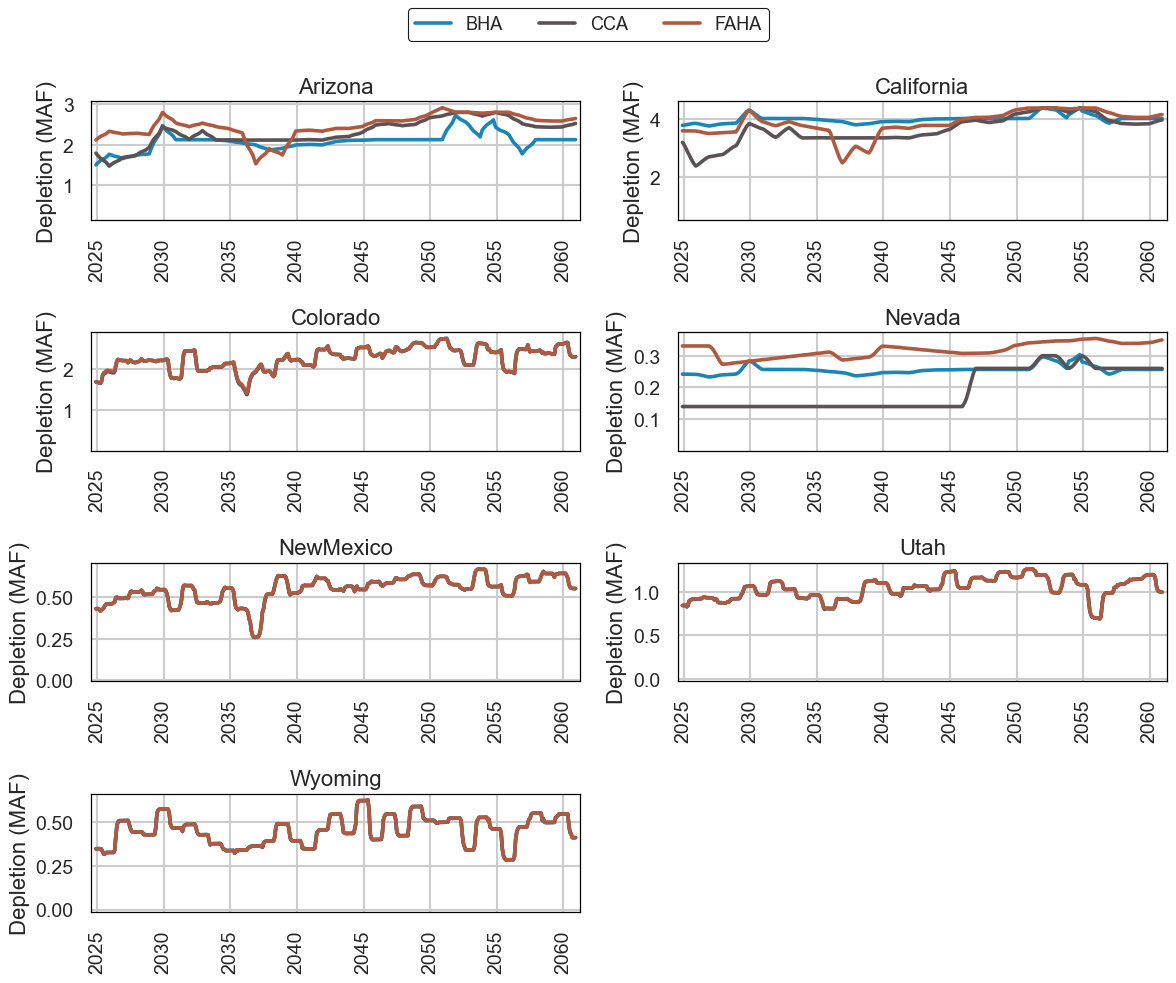

✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\FigS4_State_Depletion_AnnualSmoothing.png


In [11]:
# State Depletions - need to change to annual plot later

import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# import re

# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')


# ---------- SETTINGS ----------
figsize = (12, 10)          # adjust for your layout
year_label_step = 5
rolling_window_months = 12  # 12-month rolling mean
alpha_raw = 0.55            # faint monthly line
lw_raw = 1.0
lw_roll = 2.6               # main trend line weight
percentile_clip = (0, 100)
sharey = False              # True = same y across states (harder to read); False = per-state scale

SCENARIO_LABELS = ["BHA","CCA","FAHA"]  # order shown in legend / color map
SCENARIO_LABELS_updated = SCENARIO_LABELS

PALETTE = {
    "BHA": "#1b85b8", "CCA": "#5a5255", "FAA": "#559e83",
    "FAHA": "#ae5a41", "NAA": "#c3cb71"
}

# Files (adjust path/glob as needed)
files = sorted(glob.glob("NOABM_ComputedStateDepletions.*_monthly.csv"))

def read_table(path):
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df):
    cand = next((c for c in df.columns if any(k in c.lower() for k in ("date","year","month"))), df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[cand], errors="coerce")
    if dft["_time"].isna().all() and {"Year","Month"}.issubset(dft.columns):
        dft["_time"] = pd.to_datetime(dft["Year"].astype(int).astype(str) + "-" +
                                      dft["Month"].astype(int).astype(str) + "-01", errors="coerce")
    if dft["_time"].isna().all():
        dft["_time"] = pd.to_datetime(dft[cand].astype(str), errors="coerce")
    return dft.sort_values("_time"), "_time"

def find_scenario_columns(df, labels):
    found = {}
    for lab in labels:
        ll = lab.lower()
        for c in df.columns:
            if c.lower() == ll:
                found[lab] = c; break
        if lab not in found:
            for c in df.columns:
                if ll in c.lower():
                    found.setdefault(lab, c)
    return found

# ---------- BUILD PANELS ----------
n = len(files)
cols = 2
rows = int(np.ceil(n/cols)) if n else 1

sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
axes = axes.flatten()

all_handles = []
all_labels = []


for i, f in enumerate(files):
    ax = axes[i]
    df_raw = read_table(f)

    df, tcol = detect_time_col(df_raw)
    df.rename(columns={'NoAction': 'NAA'}, inplace=True)  # rename for consistency
    scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)

    if not scen_cols: 
        ax.set_visible(False); continue

    # Raw monthly + rolling mean
    for scen in SCENARIO_LABELS_updated:
        col = scen_cols.get(scen)
        if not col: 
            continue
        s = pd.to_numeric(df[col], errors="coerce")
        t = pd.to_datetime(df[tcol])

        # Sum
        roll = pd.Series(s.values, index=t).rolling(rolling_window_months, min_periods=3).sum()/1e6

        h, = ax.plot(roll.index[11:], roll.values[11:], color=PALETTE.get(scen, "#888888"), lw=lw_roll, label=scen, zorder=2)

    # Title from filename
    title = os.path.splitext(os.path.basename(f))[0].replace("ComputedStateDepletions.", "").replace("_monthly","")

    ax.set_title(title.replace("NOABM_", "").replace("Actual", "") , fontsize=16, pad=6)

    # Axis formatting
    ax.set_ylabel("Depletion (MAF)", fontsize=16)
    ax.set_xlabel("", fontsize=16, labelpad=0.8)   # smaller = closer
    ax.tick_params(axis="x",rotation=90,  labelsize=14)
    ax.tick_params(axis="y", labelsize=14)

    ax.xaxis.set_major_locator(YearLocator(base=year_label_step))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.margins(x=0.01)

    # Y limits clipped to 1–99th percentile to avoid spikes
    vals = []
    for scen in scen_cols.values():
        s = pd.to_numeric(df[scen], errors="coerce").values 
        v = pd.Series(s, index=t).rolling(rolling_window_months, min_periods=3).sum()/1e6 # convert to MAF

        vals.extend(v[~np.isnan(v)])  # convert to MAF
    if vals:
        lo, hi = np.nanpercentile(vals, percentile_clip)
        pad = 0.06 * (hi - lo if hi > lo else max(abs(hi), 1.0))
        if not sharey:
            ax.set_ylim(lo - pad, hi + pad)

    # Clean grid & frame
    for sp in ax.spines.values():
        sp.set_visible(True); sp.set_color("black"); sp.set_linewidth(0.9)


# Hide any empty axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Figure-level legend (top)
handles, labels = axes[0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, ncol=min(len(labels), 6), loc="upper center",
               frameon=True, fontsize=13, handlelength=2.0)
    fr = fig.legends[0].get_frame(); fr.set_edgecolor("black"); fr.set_linewidth(0.8); fr.set_alpha(0.9)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Save Figure ####
save_path = os.path.join(root, "Figure", "FigS4_State_Depletion_AnnualSmoothing.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")


0.05 2.26543284
✅ Figure saved to: C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\Figure\Fig7_LB_Shortages_Total_Heatmaps.png


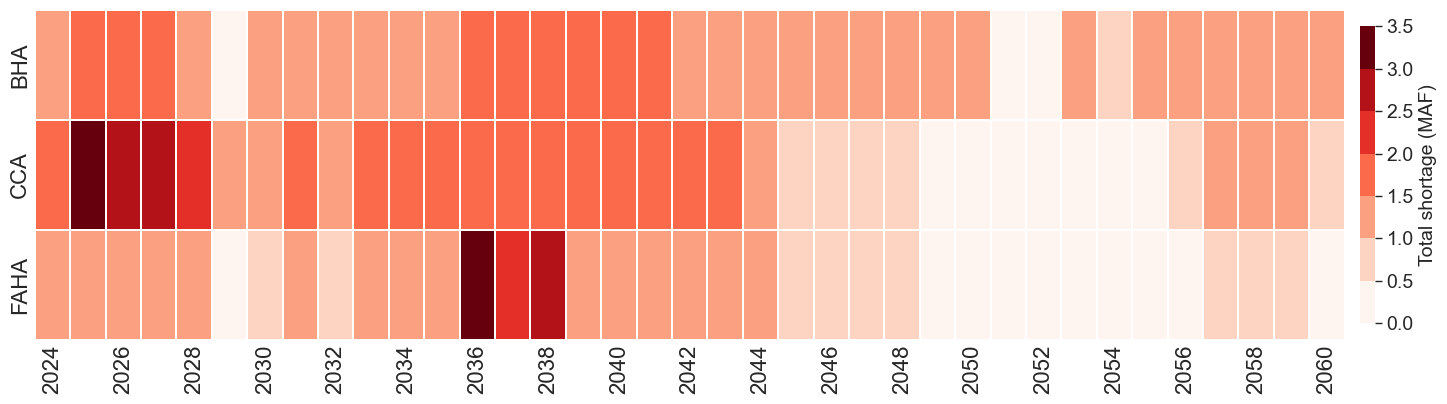

In [10]:
# === Lower Basin Shortages: Panel A (Total Shortage Heatmap, MAF, median of 30 runs)
# === Panel B (Tier Heatmap, median of 30 runs) ===

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

# change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
root = os.path.join(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1')

# ---------------- SETTINGS ----------------
SCENARIO_LABELS = ["BHA","CCA","FAHA"]  # order shown in legend / color map
SCENARIO_LABELS_updated = SCENARIO_LABELS

DIVISOR_TO_MAF = 1e6  # AF → MAF

# --- MATCH YOUR FILES EXACTLY ---
# Input files
SHORTAGE_FILES = sorted(glob.glob("NOABM_LBShort.*SpecifiedShortage_annual.csv"))

TIER_FILE = "NOABM_SystemConditions.LBShortageTier_annual.csv"

# ---------------- HELPERS ----------------
def read_table(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx",".xls"]:
        return pd.read_excel(path)
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df):
    cand = next((c for c in df.columns 
                 if any(k in c.lower() for k in ("date","time","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[cand], errors="coerce")

    # fallback if needed
    if dft["_time"].isna().all():
        dft["_time"] = pd.to_datetime(dft[cand].astype(str), errors="coerce")

    dft = dft.sort_values("_time")
    dft["Year"] = dft["_time"].dt.year
    return dft

def find_scenario_columns(df, labels):
    found = {}
    for lab in labels:
        ll = lab.lower()
        for c in df.columns:
            if c.lower() == ll:
                found[lab] = c; break
        if lab not in found:
            for c in df.columns:
                if ll in c.lower():
                    found.setdefault(lab, c)
    return found


# ---------------- LOAD AND AGGREGATE SHORTAGES ----------------
import os, re

ENTITY_CODES = ["CAP", "NWD", "IID", "MWD", "SNWP", "Mexico"]
# infer entity from the filename (CAP, MWD, IID, etc.):

def infer_entity(path):
    name = os.path.basename(path)
    m = re.search(r"LBShort\.([A-Za-z]+)SpecifiedShortage", name)
    return m.group(1) if m else "Unknown"

entity_frames = []

for f in SHORTAGE_FILES:
    df = read_table(f)
    df = detect_time_col(df)
    df.rename(columns={"NoAction": "NAA"}, inplace=True)

    scen_cols = find_scenario_columns(df, SCENARIO_LABELS_updated)
    if not scen_cols:
        continue

    sub = pd.DataFrame({"Year": df["Year"]})
    sub["Entity"] = infer_entity(f)   # <-- key addition
    # print('Entity inferred:', sub["Entity"].iloc[0])
    for scen, col in scen_cols.items():
        sub[scen] = pd.to_numeric(df[col], errors="coerce") / DIVISOR_TO_MAF

    entity_frames.append(sub)

sum_df = (
    pd.concat(entity_frames, ignore_index=True)
      .groupby("Year")[SCENARIO_LABELS_updated]
      .sum()
      .sort_index()
)
years_full = np.arange(int(sum_df.index.min()), int(sum_df.index.max()) + 1)
sum_df = sum_df.reindex(years_full).fillna(0.0)
sum_df.index.name = "Year"


years_full = np.arange(int(sum_df.index.min()), int(sum_df.index.max()) + 1)
sum_df = sum_df.reindex(years_full).fillna(0.0)
sum_df.index.name = "Year"
sum_df.to_csv(os.path.join(root, "Figure", "LB_Shortages_Total_ByScenario.csv"))

# ---------------- FIGURE ----------------
###########################################
sns.set_theme(style="white", context="paper")

data = sum_df[SCENARIO_LABELS_updated].T.to_numpy(float)
vmin, vmax = np.nanpercentile(data, [5, 95])
print(vmin, vmax)

fig =plt.figure(figsize=(16, 4))
# define discrete bins (example: 0.5 MAF steps)
bounds = np.arange(0, 3.5 + 0.5, 0.5)   # [0, 0.5, ..., 3.5]
cmap = plt.get_cmap("Reds", len(bounds) - 1)
norm = BoundaryNorm(bounds, cmap.N, clip=True)

ax = sns.heatmap(
    data,
    cmap=cmap,
    norm=norm,
    linewidths=0.3,
    linecolor="white",
    cbar_kws={
        "label": "Total shortage (MAF yr$^{-1}$)",
        "ticks": bounds,
        "shrink": 0.9,
        "pad": 0.01
    }
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label("Total shortage (MAF)", fontsize=14)

# show every 2 years
xt = np.arange(0, len(years_full), 2)
ax.set_xticks(xt + 0.5)
ax.set_xticklabels(years_full[::2], rotation=90, fontsize=16)

ax.set_yticks(np.arange(len(SCENARIO_LABELS_updated)) + 0.5)
ax.set_yticklabels(SCENARIO_LABELS_updated, fontsize=16)

# clean look
ax.tick_params(length=0)
for s in ax.spines.values():
    s.set_visible(False)

plt.tight_layout(pad=0.6)

#### Save Figure ####
save_path = os.path.join(root, "Figure", "Fig7_LB_Shortages_Total_Heatmaps.png")

# Save in high quality (600 DPI) with tight layout and white background
fig.savefig(
    save_path,
    dpi=600,            # high resolution
    bbox_inches="tight",
    facecolor="white"
)

print(f"✅ Figure saved to: {save_path}")




C:\Users\fhung2\AppData\Local\Temp\ipykernel_11544\3997475456.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


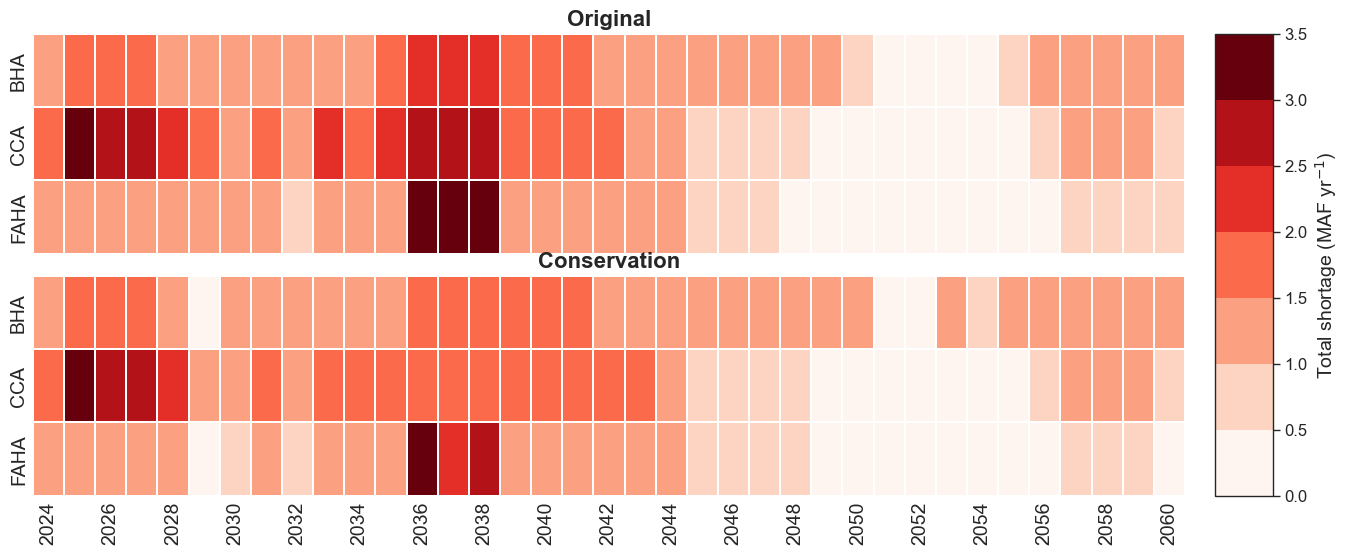

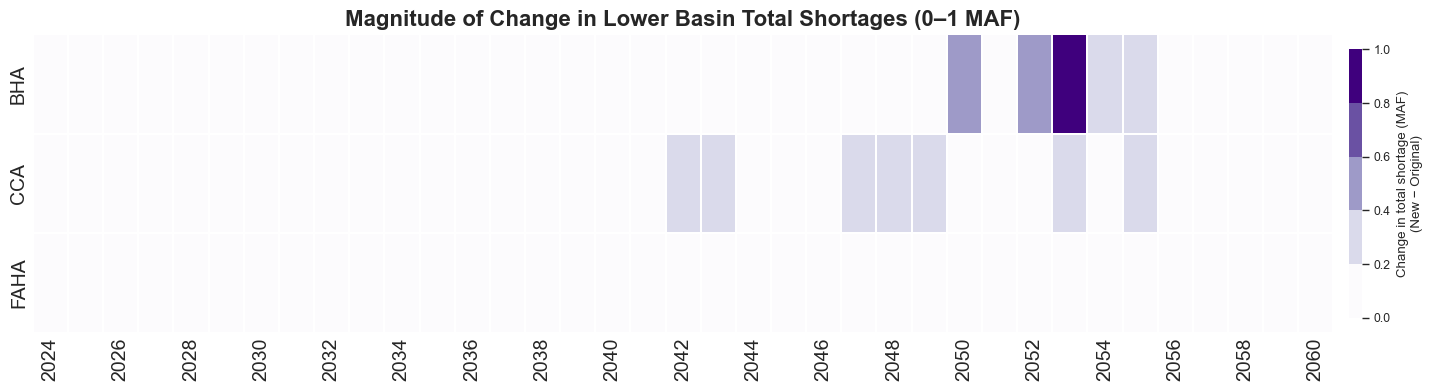

In [11]:
# Compare both Ori and New results
# === Lower Basin Shortages: Panel A (Total Shortage Heatmap, MAF, median of 30 runs)

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm


# ---------------- HELPERS ----------------
def read_table(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx",".xls"]:
        return pd.read_excel(path)
    return pd.read_csv(path, sep=None, engine="python")

def detect_time_col(df):
    cand = next((c for c in df.columns 
                 if any(k in c.lower() for k in ("date","time","year","month"))),
                df.columns[0])
    dft = df.copy()
    dft["_time"] = pd.to_datetime(dft[cand], errors="coerce")

    # fallback if needed
    if dft["_time"].isna().all():
        dft["_time"] = pd.to_datetime(dft[cand].astype(str), errors="coerce")

    dft = dft.sort_values("_time")
    dft["Year"] = dft["_time"].dt.year
    return dft

def find_scenario_columns(df, labels):
    found = {}
    for lab in labels:
        ll = lab.lower()
        for c in df.columns:
            if c.lower() == ll:
                found[lab] = c; break
        if lab not in found:
            for c in df.columns:
                if ll in c.lower():
                    found.setdefault(lab, c)
    return found

def aggregate_lb_shortages(data_dir, scenario_labels):
    os.chdir(data_dir)
    SHORTAGE_FILES = sorted(glob.glob("NOABM_LBShort.*SpecifiedShortage_annual.csv"))

    entity_frames = []

    for f in SHORTAGE_FILES:
        df = read_table(f)
        df = detect_time_col(df)
        df.rename(columns={"NoAction": "NAA"}, inplace=True)

        scen_cols = find_scenario_columns(df, scenario_labels)
        if not scen_cols:
            continue

        sub = pd.DataFrame({"Year": df["Year"]})
        sub["Entity"] = infer_entity(f)

        for scen, col in scen_cols.items():
            sub[scen] = pd.to_numeric(df[col], errors="coerce") / DIVISOR_TO_MAF

        entity_frames.append(sub)

    sum_df = (
        pd.concat(entity_frames, ignore_index=True)
          .groupby("Year")[scenario_labels]
          .sum()
          .sort_index()
    )

    years_full = np.arange(int(sum_df.index.min()), int(sum_df.index.max()) + 1)
    sum_df = sum_df.reindex(years_full).fillna(0.0)
    sum_df.index.name = "Year"

    return sum_df


# -------------- change to target directory
os.chdir(r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM')
cwd = os.getcwd()
# directories
ori_root = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_NF2000\All_Timeseries_CSVs\NOABM'
new_root = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM'

sum_ori = aggregate_lb_shortages(ori_root, SCENARIO_LABELS)
sum_new = aggregate_lb_shortages(new_root, SCENARIO_LABELS)



# align years defensively
sum_ori, sum_new = sum_ori.align(sum_new, join="inner", axis=0)

years = sum_ori.index.values




# ================= FIGURE 1 =================
# Original (top) vs Conservation (bottom), aligned with shared colorbar

sns.set_theme(style="white", context="paper")

data_ori = sum_ori[SCENARIO_LABELS].T.to_numpy(float)
data_new = sum_new[SCENARIO_LABELS].T.to_numpy(float)

bounds = np.arange(0, 3.5 + 0.5, 0.5)
cmap = plt.get_cmap("Reds", len(bounds) - 1)
norm = BoundaryNorm(bounds, cmap.N, clip=True)

# --- GridSpec layout: 2 rows, 2 columns (last column = colorbar) ---
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(
    nrows=2,
    ncols=2,
    width_ratios=[20, 1],   # reserve space for colorbar
    height_ratios=[1, 1],
    wspace=0.05,
    hspace=0.10
)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)
cax = fig.add_subplot(gs[:, 1])   # colorbar spans both rows

# --- Heatmaps (no individual colorbars) ---
hm0 = sns.heatmap(
    data_ori,
    ax=ax0,
    cmap=cmap,
    norm=norm,
    linewidths=0.3,
    linecolor="white",
    cbar=False
)

hm1 = sns.heatmap(
    data_new,
    ax=ax1,
    cmap=cmap,
    norm=norm,
    linewidths=0.3,
    linecolor="white",
    cbar=False
)

# --- Titles ---
ax0.set_title("Original", fontsize=16, fontweight="bold")
ax1.set_title("Conservation", fontsize=16, fontweight="bold")

# --- Y-axis labels ---
for ax in (ax0, ax1):
    ax.set_yticks(np.arange(len(SCENARIO_LABELS)) + 0.5)
    ax.set_yticklabels(SCENARIO_LABELS, fontsize=14)
    ax.tick_params(length=0)
    for s in ax.spines.values():
        s.set_visible(False)

# --- X-axis labels (bottom only) ---
xt = np.arange(0, len(years), 2)
ax1.set_xticks(xt + 0.5)
ax1.set_xticklabels(years[::2], rotation=90, fontsize=14)
plt.setp(ax0.get_xticklabels(), visible=False)

# --- Shared colorbar (perfectly aligned) ---
cbar = fig.colorbar(
    hm1.collections[0],
    cax=cax,
    ticks=bounds
)
cbar.set_label("Total shortage (MAF yr$^{-1}$)", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# --- Final layout ---
fig.tight_layout()
plt.show()
save_path = os.path.join(
    root, "Figure", "LB_Shortages_Original_vs_Conservation_rows.png"
)
fig.savefig(save_path, dpi=600, bbox_inches="tight", facecolor="white")
plt.close(fig)

# ================= FIGURE 2 =================
# Difference heatmap: |New − Original|, 0–1 MAF, purple scale

diff = sum_new[SCENARIO_LABELS] - sum_ori[SCENARIO_LABELS]
data_diff = diff.T.to_numpy(float)

# clip to 0–1 MAF range
data_diff_clipped = np.clip(data_diff, 0.0, 1.0)

bounds = np.linspace(0, 1.0, 6)
cmap = plt.get_cmap("Purples", len(bounds) - 1)
norm = BoundaryNorm(bounds, cmap.N, clip=True)

fig, ax = plt.subplots(figsize=(16, 4))

sns.heatmap(
    data_diff_clipped,
    ax=ax,
    cmap=cmap,
    norm=norm,
    linewidths=0.3,
    linecolor="white",
    cbar_kws={
        "label": "Change in total shortage (MAF)\n(New − Original)",
        "ticks": bounds,
        "shrink": 0.9,
        "pad": 0.01
    }
)

ax.set_title(
    "Magnitude of Change in Lower Basin Total Shortages (0–1 MAF)",
    fontsize=16,
    fontweight="bold"
)

ax.set_xticks(np.arange(0, len(years), 2) + 0.5)
ax.set_xticklabels(years[::2], rotation=90, fontsize=14)

ax.set_yticks(np.arange(len(SCENARIO_LABELS)) + 0.5)
ax.set_yticklabels(SCENARIO_LABELS, fontsize=14)

ax.tick_params(length=0)
for s in ax.spines.values():
    s.set_visible(False)

fig.tight_layout()
plt.show()
save_path = os.path.join(
    root, "Figure", "Figx_LB_Shortages_Difference_0to1MAF_Purple.png"
)
fig.savefig(save_path, dpi=600, bbox_inches="tight", facecolor="white")
plt.close(fig)



C:\Users\fhung2\AppData\Local\Temp\ipykernel_11544\259172730.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.90])


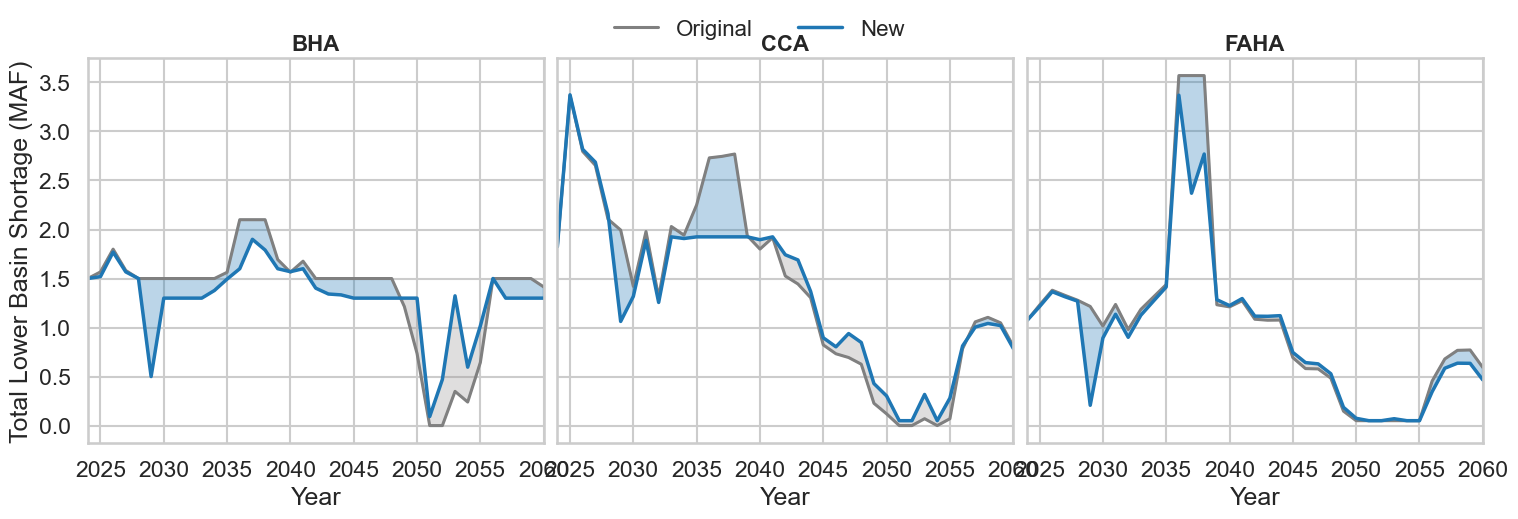

In [12]:
# ================= FIGURE 1 =================
# Baseline + increase band (single-color, no white gaps)
from matplotlib.ticker import MultipleLocator


sns.set_theme(style="whitegrid", context="talk")
ori_root = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_NF2000\All_Timeseries_CSVs\NOABM'
new_root = r'C:\Users\fhung2\ASU Dropbox\Feng-wei Hung\CRSS-ABM\Data\NoABM_Conserve1\All_Timeseries_CSVs\NOABM'

# actual shortage allocated to CAP, IID, SNAP, and MWD
sum_ori = aggregate_lb_shortages(ori_root, SCENARIO_LABELS)
sum_new = aggregate_lb_shortages(new_root, SCENARIO_LABELS)

# # shortage determined by shortage mechanism
# sum_ori = read_table(os.path.join(ori_root,"NOABM_NSW.LBReductionVol_annual.csv"))
# sum_new = read_table(os.path.join(new_root,"NOABM_NSW.LBReductionVol_annual.csv"))

# shortage with offset from NSW
# sum_ori = read_table(os.path.join(ori_root,"NOABM_NSW.LBReductionVol_w_NSW_annual.csv"))
# sum_new = read_table(os.path.join(new_root,"NOABM_NSW.LBReductionVol_w_NSW_annual.csv"))

# align years defensively
sum_ori, sum_new = sum_ori.align(sum_new, join="inner", axis=0)
years = sum_ori.index.values

# print(sum_ori)
# print(years)

# """""
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(SCENARIO_LABELS),
    figsize=(18, 5),
    sharey=True,
    gridspec_kw={"wspace": 0.03}   # 🔑 tighten horizontal gaps
)

years = sum_ori.index.values

# single Nat Comms–style blue
BLUE = "#1f77b4"
# Nature Communications–style colors
Blue_FILL = "#1f77b4"  # muted blue (color-blind safe)
Gray_FILL  = "#979292"   # muted vermilion (not alarmist)
for ax, scn in zip(axes, SCENARIO_LABELS):

    ori = sum_ori[scn].values
    new = sum_new[scn].values

    # --- Original baseline ---
    ax.plot(
        years, ori,
        color="0.5",
        linewidth=2.2,
        label="Original"
    )

    # --- Conservation outcome ---
    ax.plot(
        years, new,
        color=BLUE,
        linewidth=2.5,
        label="New"
    )

    # formatting
    ax.set_title(scn, fontsize=16, fontweight="bold")
    ax.set_xlim(years.min(), years.max())
    # Set major ticks every 5 years
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.margins(x=0)          # 🔑 remove white margins
    ax.set_xlabel("Year")
    # New > Original  → increase in total demand reduction (muted red)
    ax.fill_between(
        years,
        ori,
        new,
        where=(new > ori),
        interpolate=True,
        color=Gray_FILL,
        alpha=0.30
    )

    # New < Original → decrease in total demand reduction (muted blue)
    ax.fill_between(
        years,
        ori,
        new,
        where=(new < ori),
        interpolate=True,
        color=Blue_FILL,
        alpha=0.30
    )
axes[0].set_ylabel("Total Lower Basin Shortage (MAF)")

# ---- shared legend (clean, minimal) ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles[:2], labels[:2],   # no need to list the band separately
    loc="upper center",
    ncol=2,
    frameon=False,
    fontsize=16
)

fig.tight_layout(rect=[0, 0, 1, 0.90])

save_path = os.path.join(
    root, "Figure", "Fig11_LB_Shortages_Blue_NSW_0212_LBreduction_w.png"
)
fig.savefig(save_path, dpi=600, bbox_inches="tight", facecolor="white")

plt.show()
plt.close(fig)
# """""


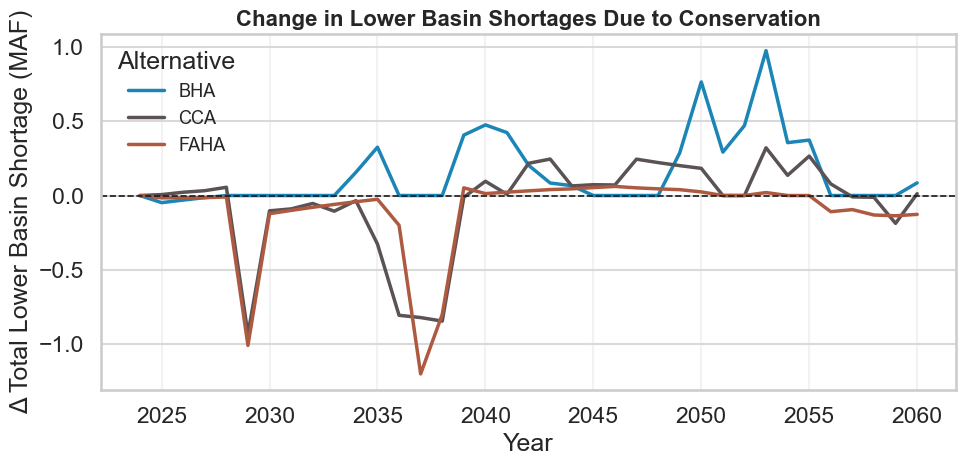

In [22]:
# ================= FIGURE 2 =================
# Difference time series: New − Original (by alternative)
SCN_COLORS = {
    "BHA": "#1b85b8",   # blue
    "CCA": "#5a5255",   # gray
    "FAHA": "#ae5a41"   # brown
}
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 5))

years = sum_ori.index.values

for scn in SCENARIO_LABELS:
    delta = sum_new[scn] - sum_ori[scn]

    ax.plot(
        years,
        delta,
        linewidth=2.5,
        color=SCN_COLORS[scn],
        label=scn
    )

# zero reference line
ax.axhline(0, color="k", lw=1.2, ls="--")

# labels and title
ax.set_ylabel("Δ Total Lower Basin Shortage (MAF)")
ax.set_xlabel("Year")
ax.set_title(
    "Change in Lower Basin Shortages Due to Conservation",
    fontsize=16,
    fontweight="bold"
)

# grid styling
ax.grid(axis="y", color="0.85")
ax.grid(axis="x",  color="0.95")

# legend
ax.legend(frameon=False, fontsize=13, title="Alternative")

fig.tight_layout()

save_path = os.path.join(
    root, "Figure", "Fig2_Delta_Shortage_TimeSeries_ByAlternative.png"
)
fig.savefig(save_path, dpi=600, bbox_inches="tight", facecolor="white")

plt.show()
plt.close(fig)